## Graphs of incompleteness by protein, incompleteness by drug perturbation


C:\Users\abdul\AppData\Local\Temp\ipykernel_3736\2210367962.py:6: DtypeWarning: Columns (8546) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


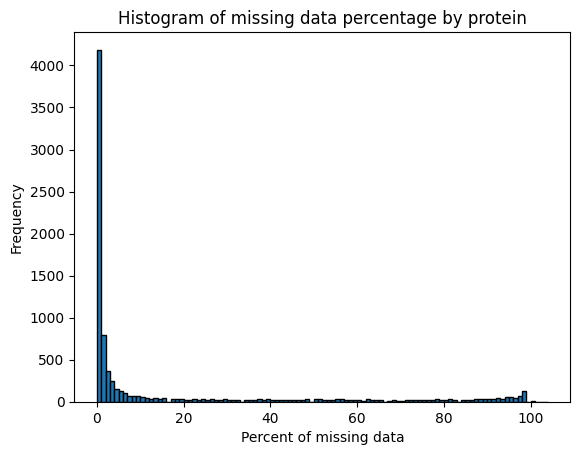

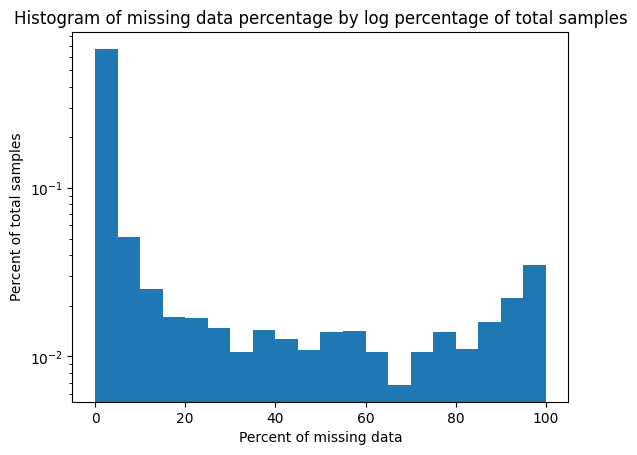

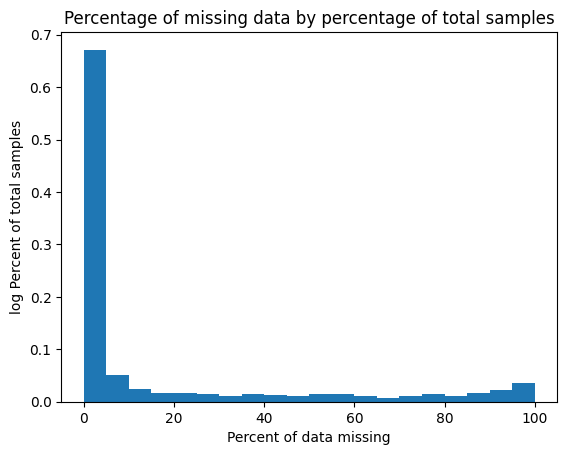

fully complete data: 4187
overall data columns: 8556


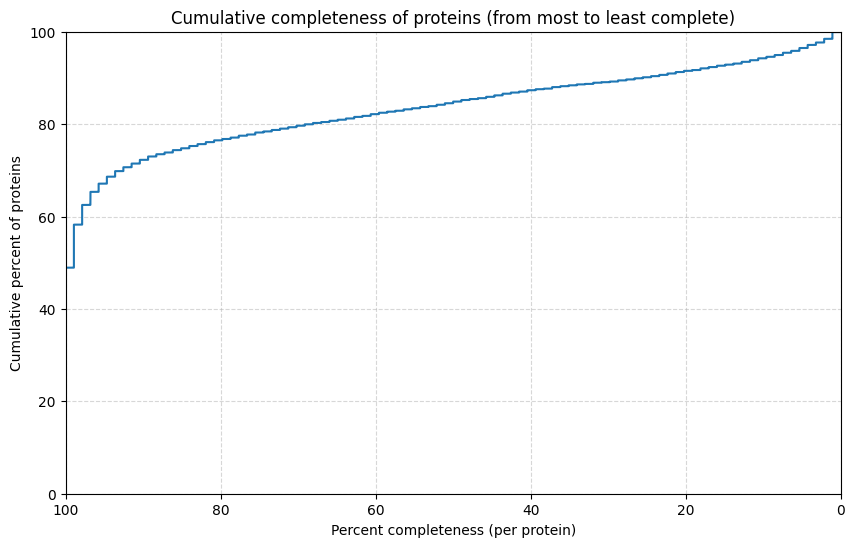

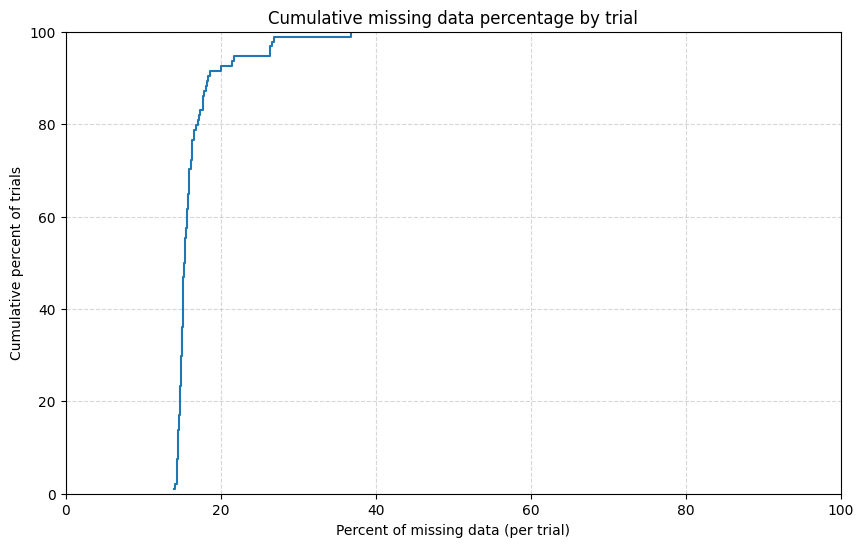

Incompleteness values per trial (percent missing data for each trial):
0     14.668069
1     14.340813
2     15.053763
3     18.349696
4     15.088827
        ...    
89    14.890136
90    15.158953
91    14.340813
92    15.883590
93    17.379617
Length: 94, dtype: float64


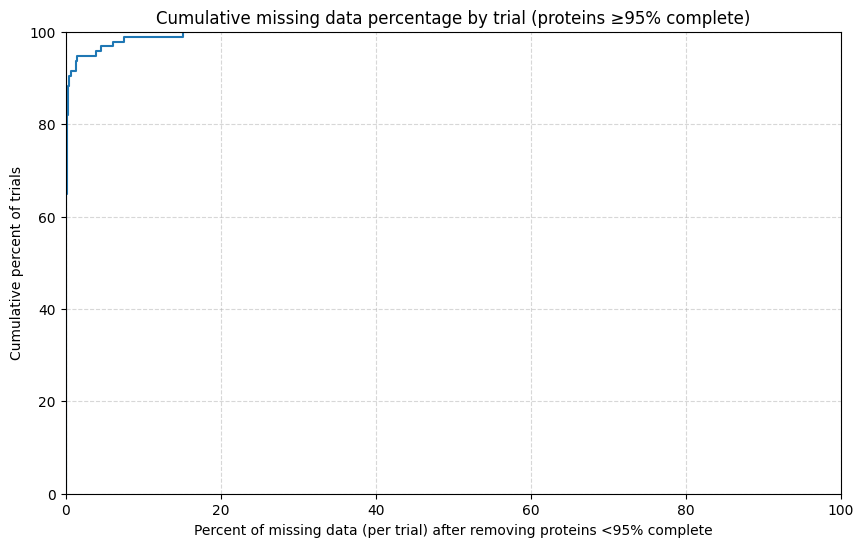

Incompleteness values per trial (percent missing data for each trial, proteins ≥95% complete), sorted from smallest to largest:
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.0174125
  0.0174125   0.0174125   0.0174125   0.0174125   0.0174125   0.0174125
  0.0174125   0.0174125   0.0174125   0.0174125   0.034825    0.034825
  0.034825    0.034825    0.034825    0.034825    0.034825    0.034825
  0.034825    0.034825    0.034825    0.034825    0.034825    0.034825
  0.05223751  0.05223751  0.05223751  0.05223751  0.05223751  0.05223751
  0.05223751  0.05223751  0.06965001  0.06965001  0.06965001  0.06965001
  0.06965001  0.06965001  0.08706251  0.08706251  0.08706251  0.08706251
  0.08706251  0.08706251  0.10447501  0.10447501  0.10447501  0.10447501
  0.10447501  0.13930002  0.13930002  0.15671252  0.15671252  0.15671252
  0.15671252  0.17412502  0.17412502  0.17412502  0.17412502  0.17412502
  0.17412502

,sample_id,A0A024RBG1,A0A0B4J2D5,A0AV96,A0AVF1,A0AVT1,A0FGR8,A0JNW5,A0MZ66,A1A4S6,...,cell,pert_time_hrs,pert_id,drugName,SMILES,pathway,target,Uniprot.ID,batch,Cell_viability%_(cck8Drug-blk)/(control-blk)*100
12,G3543,17.534592,22.151899,20.526117,18.061899,23.323886,21.416995,18.404518,22.783567,18.410663,...,HCT116,24,508,Miconazole nitrate,O[N+](=O)[O-].Clc1cc(Cl)c(COC(Cn2ccnc2)c2c(Cl)...,Microbiology&Virology,Antifungal,not human,CAB,24.364676
58,G3555,17.324550,22.450100,20.385740,17.206690,23.455130,21.447580,18.092840,23.377820,19.244030,...,HCT116,24,520,Dorzolamide hydrochloride,c12c([C@H](C[C@@H](S1(=O)=O)C)NCC)cc(s2)S(=O)(...,Metabolism,Carbonic Anhydrase inhibitor,P00918;P22748;P00915;P07451,CAB,123.951715
63,G3566,17.958250,22.078880,19.974210,NaN,22.777560,21.701340,16.253910,22.747140,21.042600,...,HCT116,24,531,Fluorouracil,Fc1c[nH]c(=O)[nH]c1=O,DNA Damage/DNA Repair,DNA/RNA Synthesis,P04818,CAC,37.134689


In [45]:
#////////////INCOMPLETENESS//////////////
import pandas as pd

# Load the data from the CSV file
data_path = r'C:\Users\abdul\OneDrive - University of Cambridge\Desktop\MDRA\cellbox_torch\preprocessing\data.csv'
df = pd.read_csv(data_path)

# Display the first few rows of the dataframe
df.head()

import matplotlib.pyplot as plt
import numpy as np
# Plot a histogram with the x axis being the percent of data for each label that is incomplete, 
# and the y axis being frequency, put them into bins of 5% each
plt.title('Histogram of missing data percentage by protein')
plt.hist(df.isnull().mean(axis=0)*100, bins=np.arange(0, 105, 1), edgecolor='black')
plt.xlabel('Percent of missing data')
plt.ylabel('Frequency')

plt.show()
df_nan = df.isnull().mean(axis=0)*100
plt.hist(df_nan, bins=np.arange(0, 105, 5), weights=np.ones_like(df_nan)/len(df_nan))
plt.title('Histogram of missing data percentage by log percentage of total samples')
plt.yscale('log')
plt.xlabel('Percent of missing data')
plt.ylabel('Percent of total samples')
plt.show()
plt.title('Percentage of missing data by percentage of total samples')
plt.hist(df_nan, bins=np.arange(0, 105, 5), weights=np.ones_like(df_nan)/len(df_nan))
plt.xlabel('Percent of data missing')
plt.ylabel('log Percent of total samples')
plt.show()
#coun the number of features with no missing data:
# subtract off 13 to get the nubmer of proteins 
df_nonan = df.isnull().mean(axis=0)*100
df_nonan = df_nonan[df_nonan == 0]
print('fully complete data: '+str(len(df_nonan)))
print('overall data columns: '+str(len(df.columns)))


#///////////////////////CUMULATIVE INCOMPLETENESS/////////////////
#/////////////////////////////////////////////////////////////////
#/////////////////////////////////////////////////////////////////
completeness = 1 - df.isnull().mean(axis=0)  # fraction complete for each column
completeness_percent = completeness * 100

# Sort from most complete to least complete
sorted_completeness = np.sort(completeness_percent)[::-1]

# Calculate cumulative percent of proteins/features with finer steps
# Use a finer step by interpolating between points
num_points = len(sorted_completeness)
# Interpolate to 10x more points for smoother steps
interp_points = np.linspace(0, num_points - 1, num_points * 10)
interp_completeness = np.interp(interp_points, np.arange(num_points), sorted_completeness)
cumulative = interp_points / num_points * 100

plt.figure(figsize=(10, 6))
plt.step(interp_completeness, cumulative, where='post')
plt.xlabel('Percent completeness (per protein)')
plt.ylabel('Cumulative percent of proteins')
plt.title('Cumulative completeness of proteins (from most to least complete)')
plt.xlim(100, 0)  # x axis goes from 100% to 0%
plt.ylim(0, 100)  # y axis starts at 0%
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.show()

# ////////////////////////////////////////////INCOMPLETENESS BY TRIAL//////
# Calculate incompleteness (fraction of missing data) by trial (row)
trial_incompleteness = df.isnull().mean(axis=1) * 100  # percent missing per trial

plt.figure(figsize=(10, 6))
# Sort the incompleteness values
sorted_trial_incompleteness = np.sort(trial_incompleteness)
# Calculate cumulative percent of trials
cumulative_trials = np.arange(1, len(sorted_trial_incompleteness) + 1) / len(sorted_trial_incompleteness) * 100
plt.step(sorted_trial_incompleteness, cumulative_trials, where='post')
plt.xlabel('Percent of missing data (per trial)')
plt.ylabel('Cumulative percent of trials')
plt.title('Cumulative missing data percentage by trial')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.show()

# Print the incompleteness values per trial
print("Incompleteness values per trial (percent missing data for each trial):")
print(trial_incompleteness)

# Plot the incompleteness of each trial after removing all proteins that are less than 95% complete:

# First, filter out proteins (columns) that are less than 95% complete
protein_completeness = 1 - df.isnull().mean(axis=0)
proteins_95_complete = protein_completeness[protein_completeness >= 0.95].index
df_95 = df[proteins_95_complete]

# Calculate incompleteness (fraction of missing data) by trial (row) for the filtered dataframe
trial_incompleteness_95 = df_95.isnull().mean(axis=1) * 100  # percent missing per trial

plt.figure(figsize=(10, 6))
# Sort the incompleteness values
sorted_trial_incompleteness_95 = np.sort(trial_incompleteness_95)
# Calculate cumulative percent of trials
cumulative_trials_95 = np.arange(1, len(sorted_trial_incompleteness_95) + 1) / len(sorted_trial_incompleteness_95) * 100
plt.step(sorted_trial_incompleteness_95, cumulative_trials_95, where='post')
plt.xlabel('Percent of missing data (per trial) after removing proteins <95% complete')
plt.ylabel('Cumulative percent of trials')
plt.title('Cumulative missing data percentage by trial (proteins ≥95% complete)')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.show()

# Print the incompleteness values per trial for the filtered dataframe
print("Incompleteness values per trial (percent missing data for each trial, proteins ≥95% complete), sorted from smallest to largest:")
sorted_incompleteness = np.sort(trial_incompleteness_95)
print(sorted_incompleteness)

#//////////////////////CHECKING IF THE TRIALS THAT ARE MORE THAN 5% INCOMPLETE HAVE ANY TARGETED PROTEINS:
# Get the indices of trials (rows) that are more than 5% incomplete after filtering proteins
trials_more_than_5_incomplete = trial_incompleteness_95[trial_incompleteness_95 > 5].index

# Create a dataframe of these trials from the filtered dataframe (df_95)
df_trials_more_than_5_incomplete = df_95.loc[trials_more_than_5_incomplete]

print("Dataframe of trials more than 5% incomplete (after removing proteins <95% complete):")
df_trials_more_than_5_incomplete.head()


## Which trials have targted proteins, and what is viability for them?

C:\Users\abdul\AppData\Local\Temp\ipykernel_3736\1267309823.py:3: DtypeWarning: Columns (8546) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv(data_path)


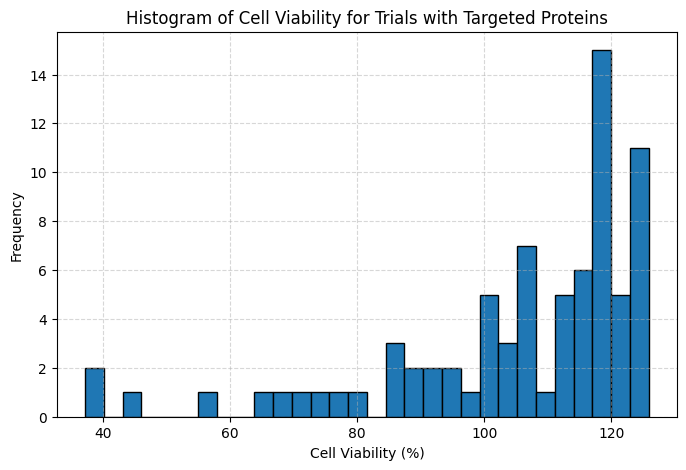

Plotted histogram for column: Cell_viability%_(cck8Drug-blk)/(control-blk)*100


In [46]:
import pandas as pd
data_path = r'C:\Users\abdul\OneDrive - University of Cambridge\Desktop\MDRA\cellbox_torch\preprocessing\data.csv'
raw_data = pd.read_csv(data_path)
# Pull out all rows from raw_data that have a valid entry in the column 'Uniprot.ID'
if 'Uniprot.ID' in raw_data.columns:
    raw_data_with_uniprot = raw_data[
        raw_data['Uniprot.ID'].notnull() &
        (raw_data['Uniprot.ID'].astype(str).str.strip() != "") &
        (~raw_data['Uniprot.ID'].astype(str).str.lower().str.strip().isin(['not protein', 'not human']))
    ]
# Plot a histogram of the cell viability for the trials in the raw_data_with_uniprot dataframe

import matplotlib.pyplot as plt

# Try to find the cell viability column (case-insensitive, allow for possible variations)
viability_col_candidates = [
    'Cell_viability%_(cck8Drug-blk)/(control-blk)*100',
    'Cell_viability', 
    'cell_viability', 
    'Cell Viability', 
    'cell viability'
]
viability_col = None
for col in viability_col_candidates:
    if col in raw_data_with_uniprot.columns:
        viability_col = col
        break

if viability_col is not None:
    cell_viability_values = raw_data_with_uniprot[viability_col].dropna()
    plt.figure(figsize=(8, 5))
    plt.hist(cell_viability_values, bins=30, edgecolor='black')
    plt.title('Histogram of Cell Viability for Trials with Targeted Proteins')
    plt.xlabel('Cell Viability (%)')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()
    print(f"Plotted histogram for column: {viability_col}")
else:
    print("Could not find a cell viability column in raw_data_with_uniprot.")




## histogram of protein values and what statistical distribution best describes the data


Mmean value of all protein values:  20.543985041467568


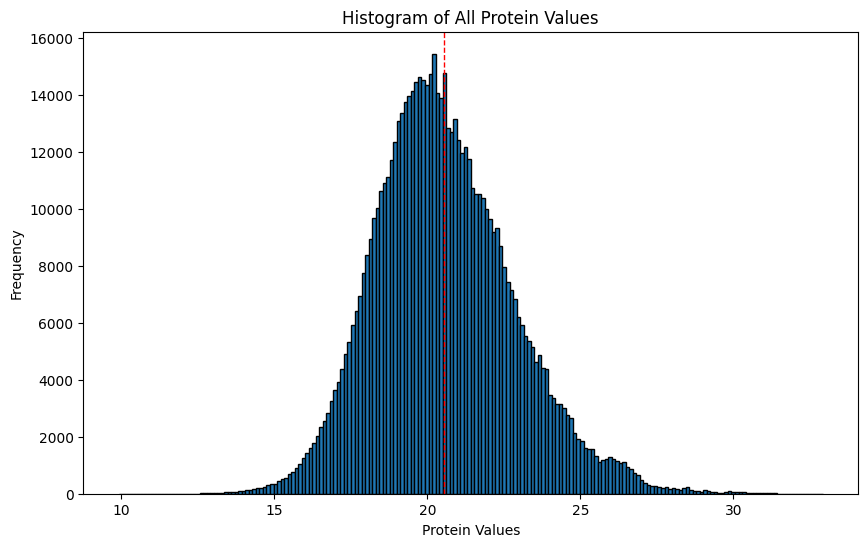

131979
A0A024RBG1     3
A0A096LP01     5
A0A0B4J2F0    78
A0A0U1RRL7    90
A0AVF1         2
              ..
pathway        1
target         1
Gene.Name     41
Uniprot.ID     3
note          89
Length: 4369, dtype: int64
804264
16.409910178747616


c:\Users\abdul\.conda\envs\cellbox\lib\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


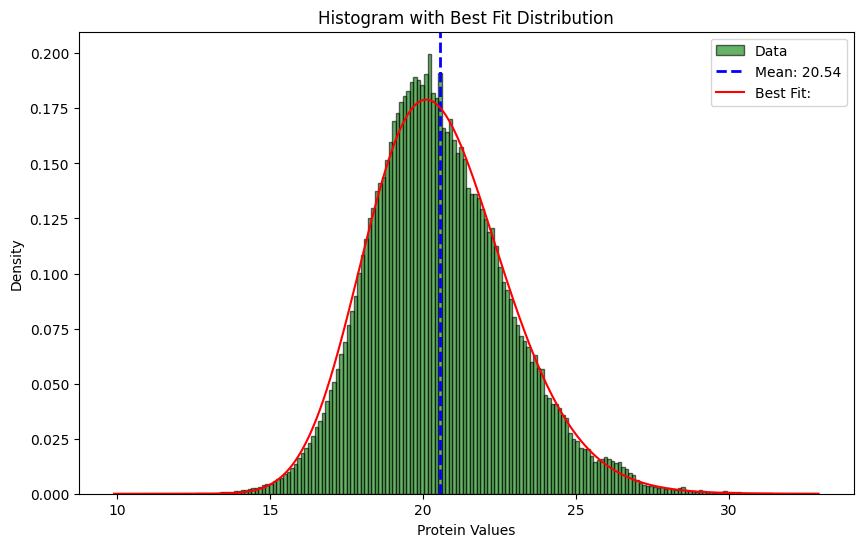

Best Fit Distribution: lognorm
P-value: 4.06855043737645e-83
Parameters: (0.12979793266238562, 3.0783118444171187, 17.319020545034142)


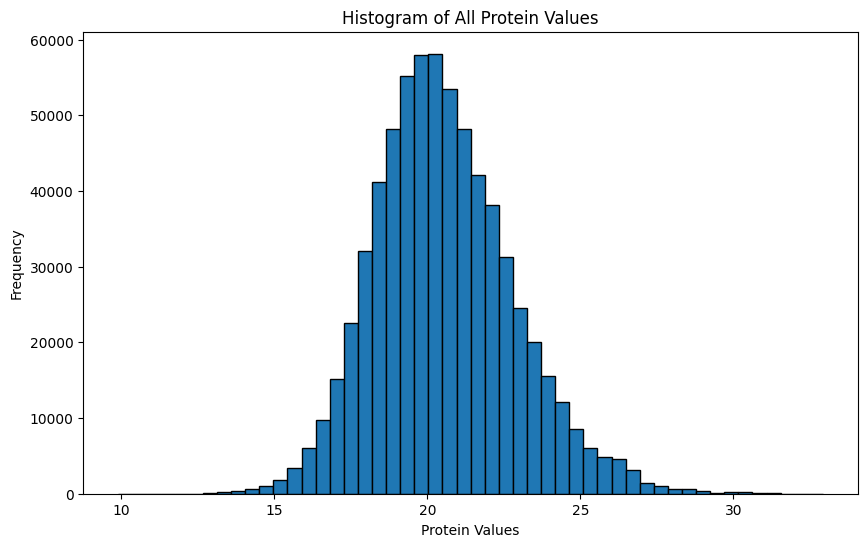

In [47]:
#////////////////////////PROTEIN DISTRIBUTIONS////////////////////
#NOTE THIS CELL BLOCK TAKES ~2 MINUTES TO RUN (BECAUSE OF THE FITTING TO DIFFERENT DISTRIBUTIONS)
# now plotting which of the proteins has the largest standard deviation in measurement:
#first normalizing the data between 0 and 1 (in the event protein quantities are just generally large
#only number dataframe:
only_num=df.iloc[:, 1:-12]
onenorm_df= only_num.div(only_num.max(axis=0), axis=1)


from scipy import stats

plt.figure(figsize=(10, 6))
plt.hist(only_num.values.flatten(), bins=200, edgecolor='black')
plt.title('Histogram of All Protein Values')
plt.xlabel('Protein Values')
plt.ylabel('Frequency')
#calculating mean of all values:
mean_value = np.nanmean(only_num.values.flatten())
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label='Mean Value')
print('Mmean value of all protein values: ', mean_value)
plt.show()

#NaN counter:
#count the number of NaN values in the dataframe
df_nan = df.isnull().sum(axis=0)
df_nan = df_nan[df_nan > 0]
print (sum(df_nan.values))
print(df_nan)

print(len(df.values.flatten()))
print(sum(df_nan.values/len(df.values.flatten()))*100)
# Fit the data to different statistical distributions and determine the best fit
data = only_num.values.flatten()
data = data[~np.isnan(data)]  # Remove NaN values

#/////////////////////////FITTING DATA TO DIFFERENT DISTRIBUTIONS////////////////////
#///////////////////////////////////////////////////////////////////////////////////
# Fit the histogram to different statistical distributions
best_fit_distribution = None
best_p_value = 0
best_params = None
# List of distributions to check
distributions = [
    stats.norm,
    stats.poisson,
    stats.binom,
    stats.expon,
    stats.gamma,
    stats.bernoulli,
    stats.lognorm,
    stats.beta,
    stats.uniform,
    stats.weibull_min,
    stats.pareto,
]
# Iterate through the list of distributions
for distribution in distributions:
    try:
        # Fit the distribution to the data
        params = distribution.fit(data)
        
        # Perform the Kolmogorov-Smirnov test
        ks_stat, p_value = stats.kstest(data, distribution.name, args=params)
        
        # Check if this distribution has the best p-value so far
        if p_value > best_p_value:
            best_fit_distribution = distribution
            best_p_value = p_value
            best_params = params
    except Exception as e:
        # Skip distributions that fail to fit
        continue



# Plot the histogram and the best fit
plt.figure(figsize=(10, 6))
plt.hist(data, bins=200, density=True, alpha=0.6, color='g', edgecolor='black', label='Data')

# Add a vertical line for the mean
mean_val = np.mean(data)
plt.axvline(mean_val, color='b', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')

# Generate the best fit line
if best_fit_distribution is not None:
    x = np.linspace(min(data), max(data), 1000)
    pdf = best_fit_distribution.pdf(x, *best_params)
    plt.plot(x, pdf, 'r-', label=f'Best Fit:')

plt.title('Histogram with Best Fit Distribution')
plt.xlabel('Protein Values')
plt.ylabel('Density')
plt.legend()
plt.show()

# Print the best fit distribution and its parameters
if best_fit_distribution is not None:
    print(f"Best Fit Distribution: {best_fit_distribution.name}")
    print(f"P-value: {best_p_value}")
    print(f"Parameters: {best_params}")

#///////////////////////////////PLOTTING ALL PROTEINS///////////////////////

from scipy import stats

plt.figure(figsize=(10, 6))
plt.hist(only_num.values.flatten(), bins=50, edgecolor='black')
plt.title('Histogram of All Protein Values')
plt.xlabel('Protein Values')
plt.ylabel('Frequency')
plt.show()

# Flatten the data and remove NaN values
data = only_num.values.flatten()
data = data[~np.isnan(data)]


### 8 random protein's histograms to get a sense if they follow the same distribution

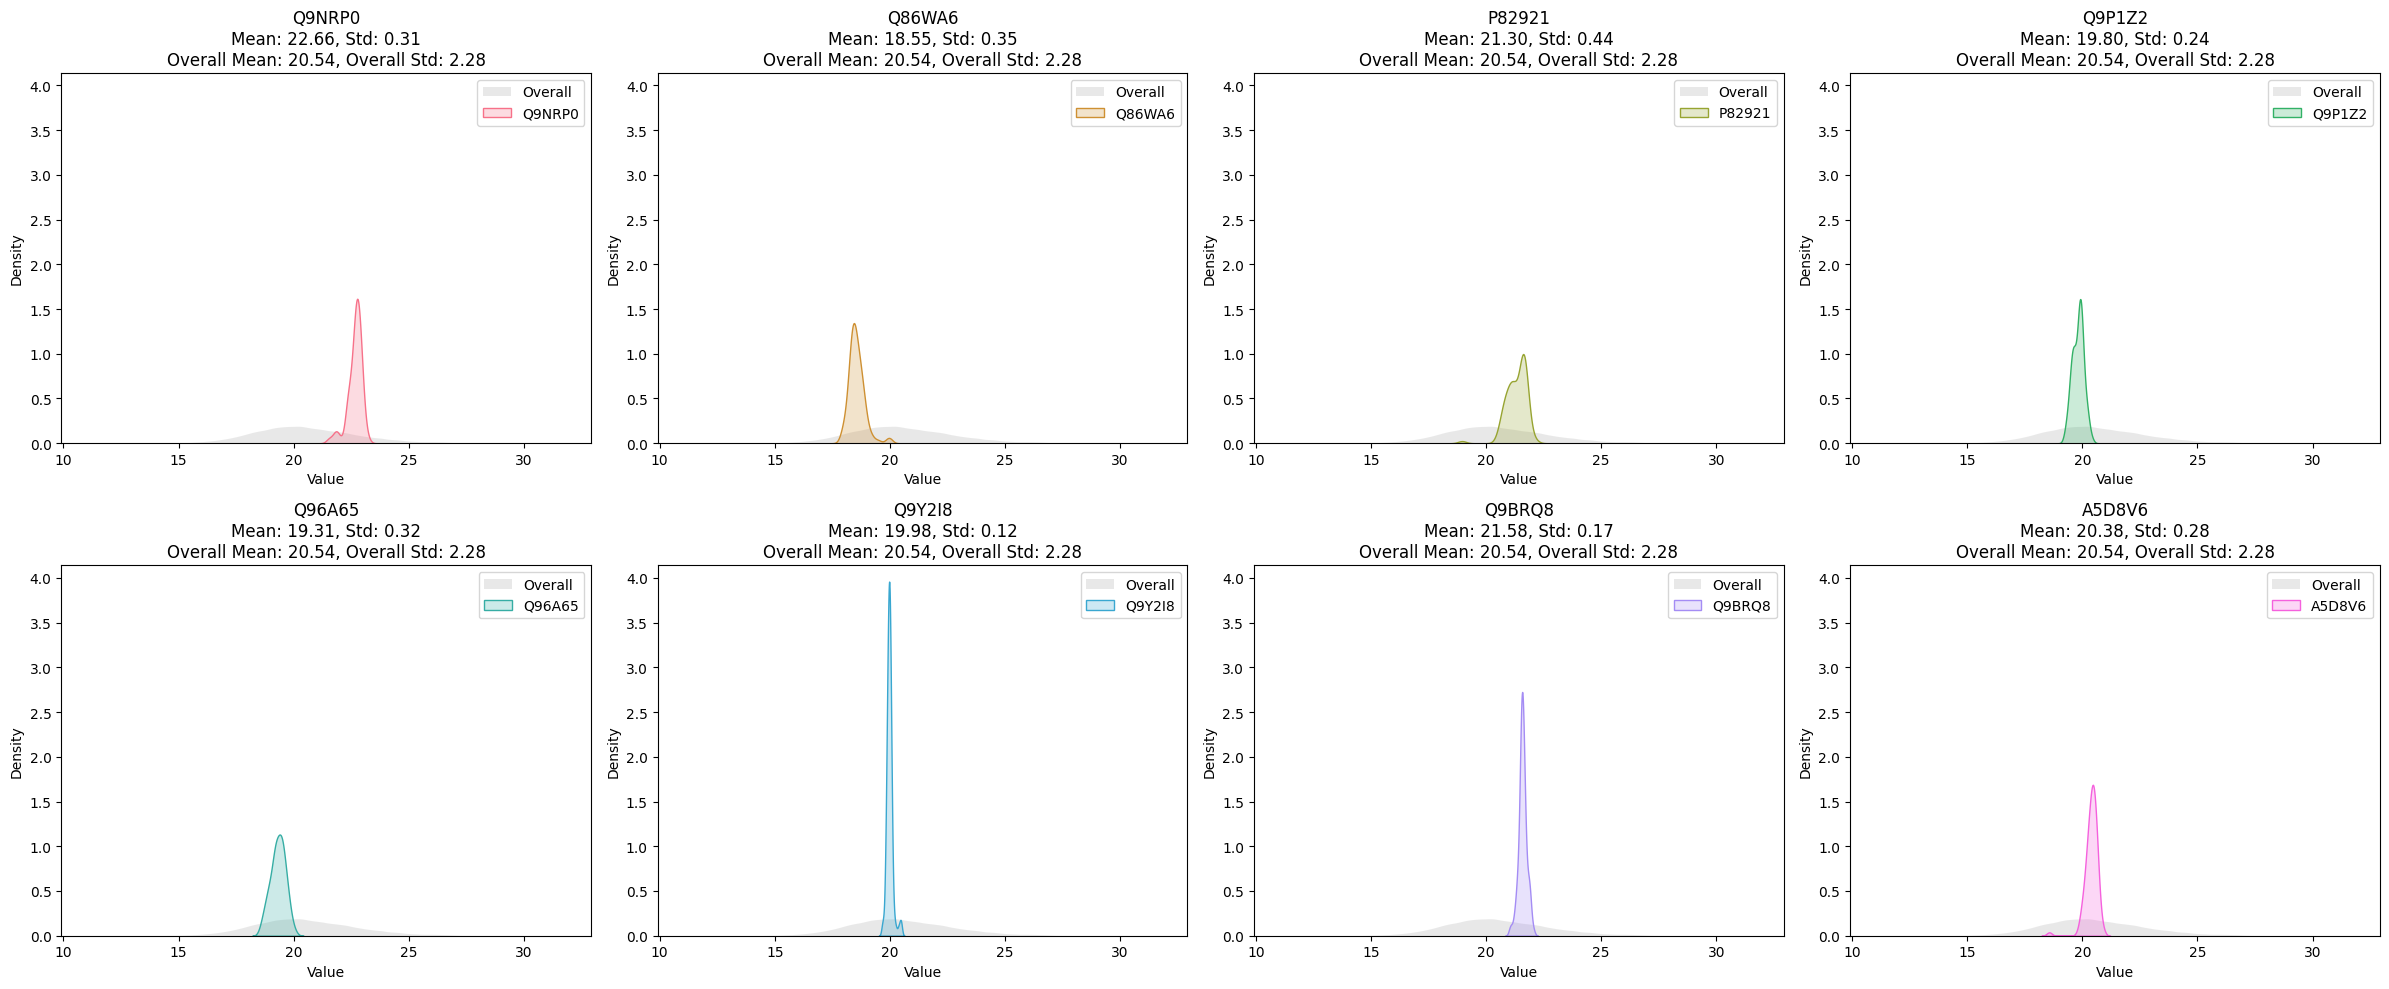

In [48]:
import random
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select 8 random protein columns from those with >95% non-NaN values
protein_completeness = only_num.notna().mean()
proteins_95_complete = protein_completeness[protein_completeness > 0.95].index.tolist()
random_proteins = random.sample(proteins_95_complete, 8)

# Compute the overall density for the entire dataset (flattened, drop NaN)
all_values = only_num.values.flatten()
all_values = all_values[~np.isnan(all_values)]

# Compute overall statistics
overall_mean = np.mean(all_values)
overall_std = np.std(all_values)

# Determine global xlim and ylim for all plots
all_min = np.nanmin(all_values)
all_max = np.nanmax(all_values)
xlim = (all_min, all_max)

# For density, get global max y across all proteins and overall
ymax = 0
x_grid = np.linspace(all_min, all_max, 1000)
# Compute overall density
if len(all_values) > 1:
    overall_kde = stats.gaussian_kde(all_values)
    overall_density = overall_kde(x_grid)
    ymax = max(ymax, np.max(overall_density))

protein_densities = []
protein_means = []
protein_stds = []
for protein in random_proteins:
    values = only_num[protein].dropna()
    protein_mean = np.mean(values)
    protein_std = np.std(values)
    protein_means.append(protein_mean)
    protein_stds.append(protein_std)
    if len(values) > 1:
        kde = stats.gaussian_kde(values)
        density = kde(x_grid)
        protein_densities.append(density)
        ymax = max(ymax, np.max(density))
    else:
        protein_densities.append(None)
        # For hist, estimate max y
        if len(values) > 0:
            hist, _ = np.histogram(values, bins=10, range=xlim, density=True)
            ymax = max(ymax, np.max(hist))

ylim = (0, ymax * 1.05)

# Use a color palette for the proteins
palette = sns.color_palette("husl", len(random_proteins))

plt.figure(figsize=(24, 10))
for i, (protein, color) in enumerate(zip(random_proteins, palette)):
    plt.subplot(2, 4, i + 1)
    values = only_num[protein].dropna()
    # Plot overall density in the background
    if len(all_values) > 1:
        sns.kdeplot(all_values, fill=True, color='lightgray', alpha=0.5, linewidth=0, label='Overall')
    # Plot protein-specific density curve or hist, with unique color
    if len(values) > 1:
        sns.kdeplot(values, fill=True, color=color, label=protein)
    else:
        plt.hist(values, bins=10, color=color, edgecolor='black', label=protein)
    # Compute stats for this protein
    protein_mean = protein_means[i]
    protein_std = protein_stds[i]
    # Title with stats
    plt.title(
        f"{protein}\n"
        f"Mean: {protein_mean:.2f}, Std: {protein_std:.2f}\n"
        f"Overall Mean: {overall_mean:.2f}, Overall Std: {overall_std:.2f}"
    )
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.legend()
plt.tight_layout()
plt.show()


### 8 random trial histograms (trials>95% completeness)

In [49]:
import seaborn as sns

# Select only numeric columns (proteins)
only_num = df.iloc[:, 1:-12]

# Calculate completeness for each row
row_completeness = only_num.notnull().mean(axis=1)

# Filter rows with >95% completeness
high_completeness_rows = only_num[row_completeness > 0.95]

# Randomly select 8 such rows (if there are at least 8)
n_rows = min(8, len(high_completeness_rows))
random_rows = high_completeness_rows.sample(n=n_rows, random_state=42)

# Flatten all values for overall density (excluding NaNs)
all_values = only_num.values.flatten()
all_values = all_values[~np.isnan(all_values)]

# Compute overall mean and std
overall_mean = np.mean(all_values)
overall_std = np.std(all_values)

plt.figure(figsize=(24, 10))

# Plot density for each random row, with overall in background and stats in title
for i, (idx, row) in enumerate(random_rows.iterrows()):
    plt.subplot(2, 4, i+1)
    row_values = row.dropna().values
    # Plot overall distribution in the background
    sns.kdeplot(all_values, fill=True, color='lightgray', alpha=0.5, linewidth=0, label='Overall')
    # Plot row-specific distribution
    if len(row_values) > 1:
        sns.kdeplot(row_values, fill=True, color='C{}'.format(i), label=f'Row {idx}')
    else:
        plt.hist(row_values, bins=10, color='C{}'.format(i), edgecolor='black', label=f'Row {idx}')
    # Compute stats for this row
    row_mean = np.mean(row_values) if len(row_values) > 0 else float('nan')
    row_std = np.std(row_values) if len(row_values) > 0 else float('nan')
    plt.title(
        f'Random Row {idx} ({len(row_values)} proteins)\n'
        f'Mean: {row_mean:.2f}, Std: {row_std:.2f}\n'
        f'Overall Mean: {overall_mean:.2f}, Overall Std: {overall_std:.2f}'
    )
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()


<Figure size 2400x1000 with 0 Axes>

## VARIANCE OF PROTEINS


C:\Users\abdul\AppData\Local\Temp\ipykernel_3736\1852513467.py:7: DtypeWarning: Columns (8546) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


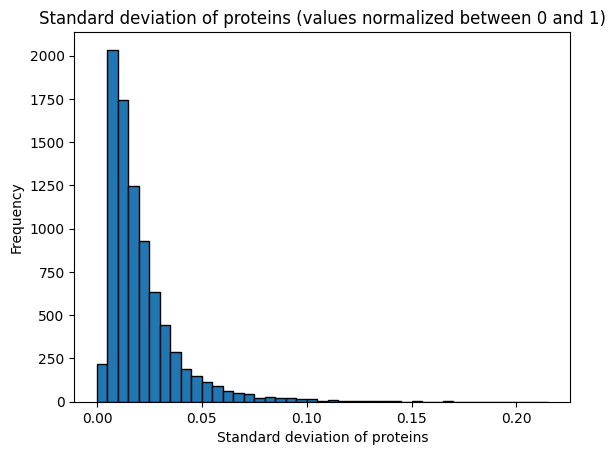

P06702
0.9787234042553191
P05109
0.9787234042553191
P15941
0.9574468085106383
Q92556
0.9787234042553191
O14494
0.9574468085106383
P02511
0.925531914893617
P31151
0.9574468085106383
O75147
0.9680851063829787
P80723
0.8404255319148937
Q96RW7
0.4787234042553192
P19012
0.5
Q9HAV0
0.9680851063829787
P09467
0.9468085106382979
Q04828
0.9574468085106383
P19013
0.7659574468085106
Q53RD9
0.9574468085106383
Q16352
0.9574468085106383
Q9H3U7
0.8936170212765957
P02765
0.3723404255319149
Q0ZGT2
0.9574468085106383
Q13201
0.925531914893617
P43358
0.5638297872340425
P23141
0.8617021276595744
O60547
0.9148936170212766
A6NLP5
0.9574468085106383
P32754
0.9787234042553191
P50479
0.9574468085106383
Q9HCH5
0.9787234042553191
P24821
0.9574468085106383
Q5HYK7
0.8723404255319149
P15309
0.851063829787234
O14503
0.9787234042553191
Q9C0H9
0.8723404255319149
Q9Y646
0.9361702127659575
P14921
0.9680851063829787
P08253
0.9787234042553191
O94875
0.9680851063829787
P02749
0.9574468085106383
P05019
0.9787234042553191
Q925

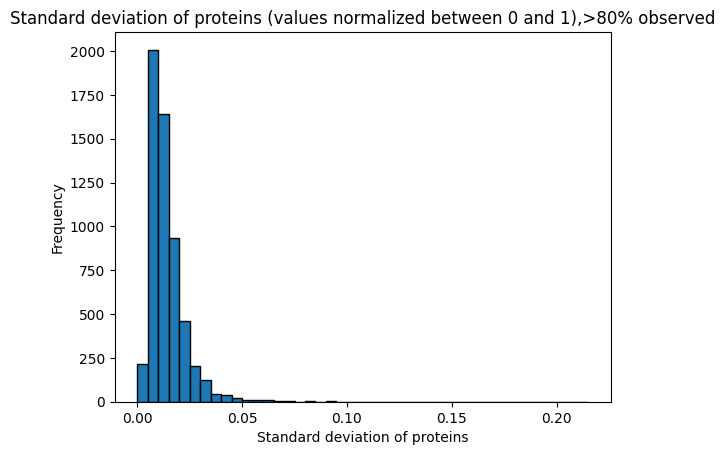

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the CSV file
data_path = r'C:\Users\abdul\OneDrive - University of Cambridge\Desktop\MDRA\cellbox_torch\preprocessing\data.csv'
df = pd.read_csv(data_path)

only_num=df.iloc[:, 1:-12]
onenorm_df= only_num.div(only_num.mean(axis=0), axis=1) #it is generally true, but adding flag so that it's clear
onenorm_df.head()

# Plot the histogram of the standard deviation of proteins
plt.title('Standard deviation of proteins (values normalized between 0 and 1)')
plt.hist(onenorm_df.std(axis=0), bins=np.arange(0, .22, 0.005), edgecolor='black')
plt.xlabel('Standard deviation of proteins')
plt.ylabel('Frequency')
plt.show()

#///////////////////////LIST OF TOP VARYING PROTEINS/////////////////////
#making a sorted list of all the standard deviations 
std_devs=onenorm_df.std(axis=0).sort_values(ascending=False)
std_devs.head()
#checking completeness of the various entries:
counter=0
for i in std_devs.index:
    if(counter<50):
        ratio=onenorm_df[i].isnull().sum()/len(onenorm_df[i])
        print(i)
        print(ratio)
counter+=1

#printing the top proteins with high variance:
std_devs_greater_0_11=std_devs[std_devs > 0.12]
keys_greater_0_11=std_devs_greater_0_11.index.tolist()
print(keys_greater_0_11)


#/////////////////////////LIST OF TOP VARYING PROTEINS>80% COMPLETION///////////
#///////////////////////////////////////////////////////////////////////////////
#now getting the top 100 variable proteins that are greater than 95% complete
percent_comp=.95
onenorm_df_dropped=onenorm_df.dropna(axis=1, thresh=len(onenorm_df)*percent_comp)
onenorm_df_dropped.head()

#plotting the histogram
plt.title('Standard deviation of proteins (values normalized between 0 and 1),>80% observed')
plt.hist(onenorm_df_dropped.std(axis=0), bins=np.arange(0, .22, 0.005), edgecolor='black')
plt.xlabel('Standard deviation of proteins')
plt.ylabel('Frequency')
plt.show()





## TOP 100 PROTEINS VARIABILITY

In [51]:
#getting the top 100 proteins and going from there:

std_devs=onenorm_df_dropped.std(axis=0).sort_values(ascending=False)

#printing the top 100 proteins with high variance:
# for i in range (100):
#     print('protein ID: ' +str(std_devs.index[i])+ '  std dev: ' + str(std_devs.values[i]))

#generating a new file with the top 100 proteins
top_100_proteins=std_devs.index[:100].tolist()
top_100_proteins_df=pd.concat([df.iloc[:, 0], df[top_100_proteins],df.iloc[:,-12:]], axis=1)
top_100_proteins_df.to_csv(r'C:\Users\abdul\OneDrive - University of Cambridge\Desktop\MDRA\cellbox_torch\preprocessing\top_100_proteins.csv', index=False)


#/////////////////////////VERIFYING IN HUMAN PROTEOME///////////////
import pandas as pd
all_human_proteins=pd.read_csv(r'C:\Users\abdul\OneDrive - University of Cambridge\Desktop\MDRA\cellbox_torch\Abdullah_kuziez\online_data\human_proteome.csv')
all_human_proteins.head()

#checking they are all in the unuiprot
counter=0
for i in top_100_proteins_df.columns[1:-12]:
    if i in all_human_proteins['Entry'].values:
        print(f"Protein {i} found in human proteome database.")
        counter+=1
print('counter: ' + str(counter))


#getting their functions:
data_on_top100=pd.DataFrame()
for i in top_100_proteins_df.columns[1:-12]:
    if i in all_human_proteins['Entry'].values:
        data_on_top100 = pd.concat([data_on_top100, all_human_proteins[all_human_proteins['Entry'] == i]], ignore_index=True)

data_on_top100.head()

#///////////CHECKING EXPRESSIONS OF TOP 100 PROTEINS////////////////////
# checking that the expressions are reasonable:
for i in top_100_proteins_df.columns[1:-12]:
    print("protein" + str(i) + " mean: " + str(top_100_proteins_df[i].mean()) + " std: " + str(top_100_proteins_df[i].std()))
    #calculating mean of the means:
mean_of_means = top_100_proteins_df.iloc[:, 1:-12].mean().mean()
print("Mean of means: " + str(mean_of_means))




Protein P02771 found in human proteome database.
Protein Q96PX9 found in human proteome database.
Protein O94886 found in human proteome database.
Protein Q96S21 found in human proteome database.
Protein Q6DHV7 found in human proteome database.
Protein P19823 found in human proteome database.
Protein Q9GZU1 found in human proteome database.
Protein P01023 found in human proteome database.
Protein Q8IUE6 found in human proteome database.
Protein Q06033 found in human proteome database.
Protein P02774 found in human proteome database.
Protein Q96JY6 found in human proteome database.
Protein P36955 found in human proteome database.
Protein P23142 found in human proteome database.
Protein P02768 found in human proteome database.
Protein Q8WY22 found in human proteome database.
Protein O60783 found in human proteome database.
Protein P01024 found in human proteome database.
Protein P62070 found in human proteome database.
Protein Q9NPD3 found in human proteome database.
Protein Q01130 found

## Running elastic_net on various sets 

In [52]:
def run_elasticnet_cv(
    cell_viability,
    proteinvalues,
    l1_ratios=None,
    alphas=None,
    cv=5,
    random_state=42,
    fit_intercept=True,
    plot=True
):
    if l1_ratios is None:
        l1_ratios = np.linspace(0.01, 1.0, 10)
    if alphas is None:
        alphas = np.logspace(-4, 1, 30)

    # Fill missing values with 0
    cell_viability_filled = np.nan_to_num(cell_viability)
    proteinvalues_filled = np.nan_to_num(proteinvalues)

    # Standardize the features
    scaler = sklearn.preprocessing.StandardScaler()
    proteinvalues_scaled = scaler.fit_transform(proteinvalues_filled)

    # Fit ElasticNetCV
    elastic_net_cv = sklearn.linear_model.ElasticNetCV(
        l1_ratio=l1_ratios,
        alphas=alphas,
        cv=cv,
        random_state=random_state,
        fit_intercept=fit_intercept
    )
    elastic_net_cv.fit(proteinvalues_scaled, cell_viability_filled)

    # Get predictions and coefficients
    predictions = elastic_net_cv.predict(proteinvalues_scaled)
    best_l1_ratio = elastic_net_cv.l1_ratio_
    best_alpha = elastic_net_cv.alpha_
    coefficients = elastic_net_cv.coef_

    # Calculate Pearson's r, p-value, and R^2, MSE
    pearson_r, pearson_p = pearsonr(cell_viability_filled, predictions)
    r2 = sklearn.metrics.r2_score(cell_viability_filled, predictions)
    mse = sklearn.metrics.mean_squared_error(cell_viability_filled, predictions)

    if plot:
        plt.plot(cell_viability_filled, predictions, 'o', alpha=0.5, label='Data')
        plt.xlabel('Actual Cell Viability')
        plt.ylabel('Predicted Cell Viability')
        plt.title(
            f'ElasticNetCV Predicted vs Actual Cell Viability\n'
            f'Best L1 Ratio = {best_l1_ratio}, Best Alpha = {best_alpha:.4f}'
        )
        # Add y=x line
        min_val = min(np.min(cell_viability_filled), np.min(predictions))
        max_val = max(np.max(cell_viability_filled), np.max(predictions))
        plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='y = x')
        plt.legend(loc='upper left', bbox_to_anchor=(0, 1))
        # Annotate with Pearson's r and R^2 in the bottom right
        plt.text(
            0.95, 0.05,
            f"Pearson r = {pearson_r:.3f}\nR$^2$ = {r2:.3f}",
            transform=plt.gca().transAxes,
            fontsize=12,
            verticalalignment='bottom',
            horizontalalignment='right',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7)
        )

    print(f'Best L1 Ratio: {best_l1_ratio}')
    print(f'Best Alpha: {best_alpha}')
    print('R^2: ' + str(r2) + ' MSE: ' + str(mse))
    print(f"Pearson's r: {pearson_r:.3f} (p={pearson_p:.3g})")

    results = {
        'best_l1_ratio': best_l1_ratio,
        'best_alpha': best_alpha,
        'coefficients': coefficients,
        'r2': r2,
        'mse': mse,
        'pearson_r': pearson_r,
        'pearson_p': pearson_p,
        'predictions': predictions
    }
    return results

C:\Users\abdul\AppData\Local\Temp\ipykernel_3736\2404174317.py:8: DtypeWarning: Columns (8546) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r'C:\Users\abdul\OneDrive - University of Cambridge\Desktop\MDRA\cellbox_torch\Abdullah_kuziez\Experiments\raw_data\data.csv')
c:\Users\abdul\.conda\envs\cellbox\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.655e+01, tolerance: 4.748e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\abdul\.conda\envs\cellbox\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.729e+02, tolerance: 4.748e+00
  mode

Best L1 Ratio: 0.01
Best Alpha: 0.28072162039411785
R^2: 0.7016139238194246 MSE: 182.58816970812853
Pearson's r: 0.861 (p=9.38e-29)


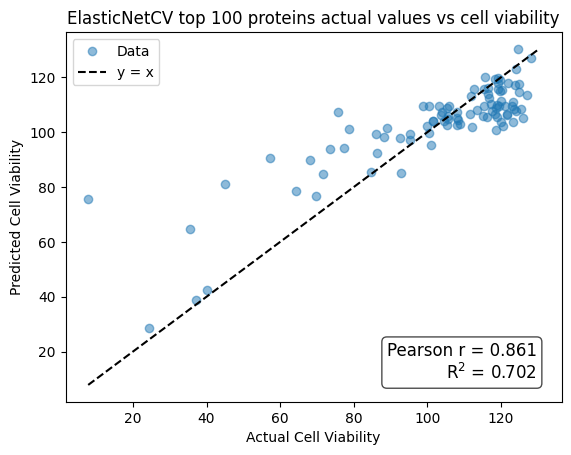

Best L1 Ratio: 0.23
Best Alpha: 0.18873918221350977
R^2: 0.6020554677031337 MSE: 0.013963038577201622
Pearson's r: 0.865 (p=1.02e-07)


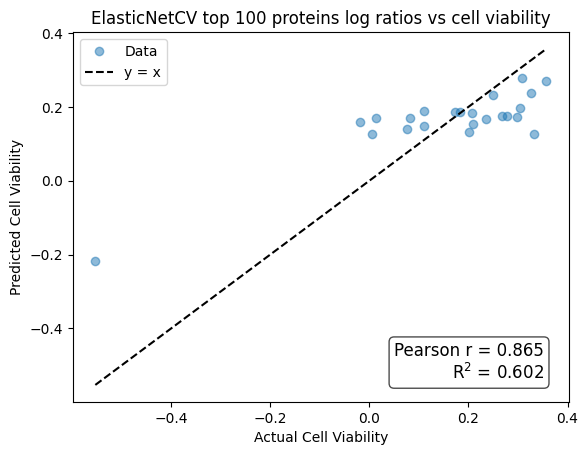

c:\Users\abdul\.conda\envs\cellbox\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


Best L1 Ratio: 0.12
Best Alpha: 10.0
R^2: 0.0 MSE: 0.035087901564093374
Pearson's r: nan (p=nan)


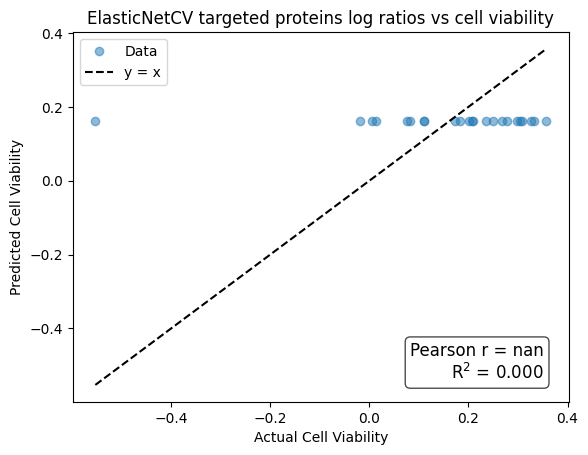

c:\Users\abdul\.conda\envs\cellbox\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.578775415165182, tolerance: 4.747681506781526
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\abdul\.conda\envs\cellbox\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 428.66985987496355, tolerance: 4.747681506781526
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\abdul\.conda\envs\cellbox\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1395.3542329249642, tolerance: 4.747681506781526
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\abdul\.conda\envs\cellbox\lib\site-packages\sklearn\

Best L1 Ratio: 0.01
Best Alpha: 1.3738237958832638
R^2: 0.4205862881782304 MSE: 354.55437632855933
Pearson's r: 0.703 (p=2.9e-15)


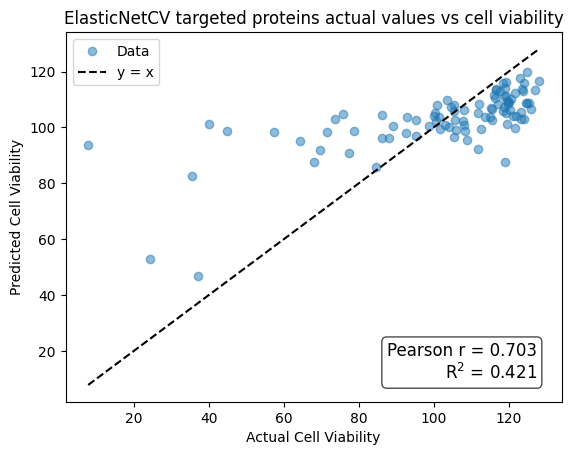

In [53]:
#run elasticnet cv
import sklearn.linear_model
import sklearn.metrics
import sklearn.preprocessing
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
df=pd.read_csv(r'C:\Users\abdul\OneDrive - University of Cambridge\Desktop\MDRA\cellbox_torch\Abdullah_kuziez\Experiments\raw_data\data.csv')
#///////////////BUILDING ELASTICNET CV////////////////////


numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.mean()))


#//////////////////////RUNNING ELASTICNET ON DIFFERENT TYPES OF DATA
#top 100 proteins using the actual values
cell_viability=top_100_proteins_df['Cell_viability%_(cck8Drug-blk)/(control-blk)*100']
protein_values=top_100_proteins_df.iloc[:,1:-12]
results = run_elasticnet_cv(cell_viability, protein_values)
plt.title('ElasticNetCV top 100 proteins actual values vs cell viability')
plt.show()


#top hundred proteins using the log ratios
log_ratios=pd.read_csv(r'C:\Users\abdul\OneDrive - University of Cambridge\Desktop\MDRA\cellbox_torch\Abdullah_kuziez\preprocessing\Intermediate_files\log_ratios.csv')
cell_viability=log_ratios['Cell_viability%_(cck8Drug-blk)/(control-blk)*100']
protein_values=log_ratios[top_100_proteins].fillna(0)
results = run_elasticnet_cv(cell_viability, protein_values)
plt.title('ElasticNetCV top 100 proteins log ratios vs cell viability')
plt.show()

#targeted proteins using the log ratios
cell_viability=log_ratios['Cell_viability%_(cck8Drug-blk)/(control-blk)*100']
targeted_proteins=pd.read_csv('Intermediate_files/targeted_proteins.txt',header=None)
targeted_proteins=targeted_proteins.iloc[:,0].tolist()
tgtd_prot_logs=log_ratios[targeted_proteins]
results = run_elasticnet_cv(cell_viability, tgtd_prot_logs)
plt.title('ElasticNetCV targeted proteins log ratios vs cell viability')
plt.show()

#targeted proteins using the actual values
cell_viability=top_100_proteins_df['Cell_viability%_(cck8Drug-blk)/(control-blk)*100']
# Fill NaNs in numeric columns of df with the mean of each column
tgt_prot_values=df[targeted_proteins]
results = run_elasticnet_cv(cell_viability, tgt_prot_values)
plt.title('ElasticNetCV targeted proteins actual values vs cell viability')
plt.show()

## Plotting data as compared to melanoma control

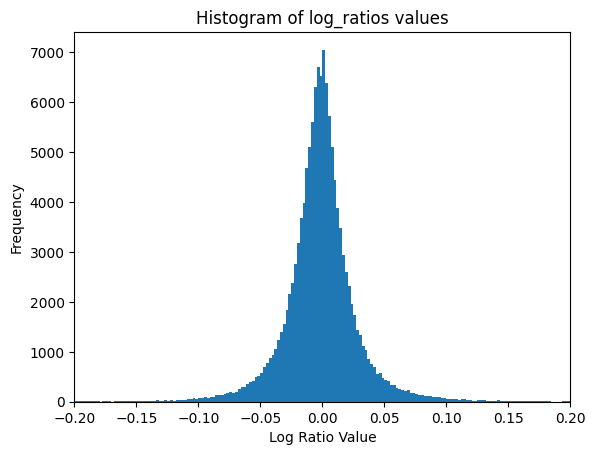

C:\Users\abdul\AppData\Local\Temp\ipykernel_3736\588048763.py:9: DtypeWarning: Columns (8546) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw=pd.read_csv(r'C:\Users\abdul\OneDrive - University of Cambridge\Desktop\MDRA\cellbox_torch\Abdullah_kuziez\Experiments\raw_data\data.csv')


Number of NaN values in protein_values_control: 1431
Indices of NaNs: [   3    4   18 ... 8530 8538 8539]
NaN values: [nan nan nan ... nan nan nan]
Mean value (ignoring NaNs): 20.583072263779528


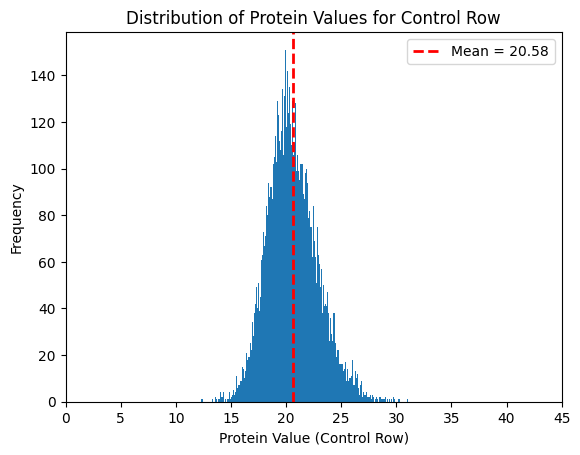

c:\Users\abdul\.conda\envs\cellbox\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\Users\abdul\.conda\envs\cellbox\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


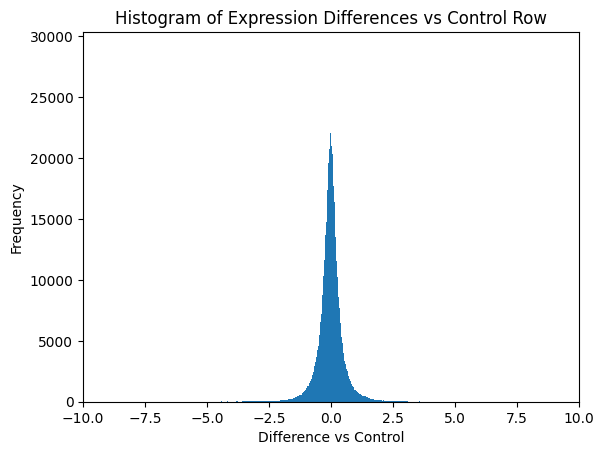

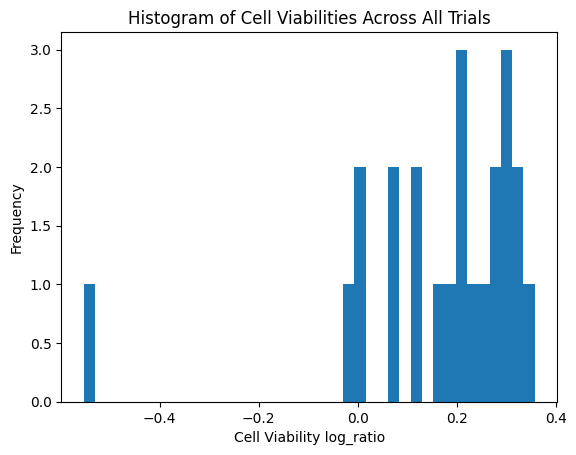

23
Cell viability histogram binsize: 0.0227461390738494


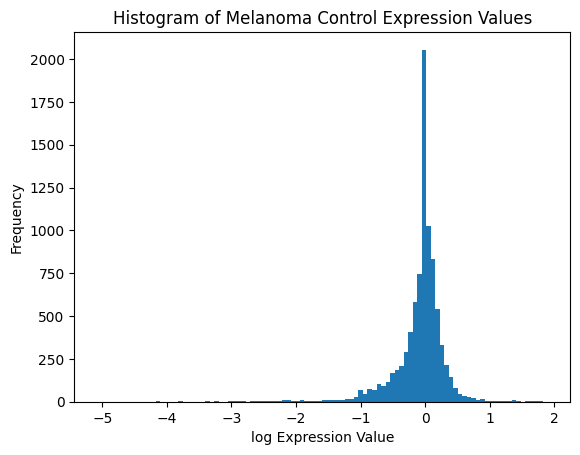

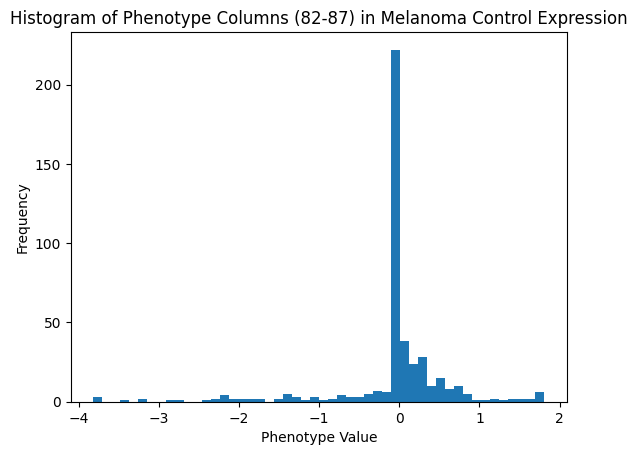

In [54]:
# Plot all values in log_ratios (excluding metadata columns) as a histogram
import matplotlib.pyplot as plt
plt.hist(log_ratios.iloc[:, :-12].values.flatten(), bins=400)
plt.xlabel('Log Ratio Value')
plt.xlim(-.2,.2)
plt.ylabel('Frequency')
plt.title('Histogram of log_ratios values')
plt.show()
df_raw=pd.read_csv(r'C:\Users\abdul\OneDrive - University of Cambridge\Desktop\MDRA\cellbox_torch\Abdullah_kuziez\Experiments\raw_data\data.csv')
# Plot the distribution of protein values for the control row (excluding metadata columns)
control_row = df_raw[df_raw['pert_id'] == 'control']
# Exclude metadata columns
protein_values_control = control_row.iloc[:, 1:-12].values.flatten()

# Check for NaNs and print how many there are
num_nans = pd.isna(protein_values_control).sum()
print(f"Number of NaN values in protein_values_control: {num_nans}")

# Optionally, print the indices or values of NaNs for debugging
if num_nans > 0:
    print("Indices of NaNs:", np.where(pd.isna(protein_values_control))[0])
    print("NaN values:", protein_values_control[pd.isna(protein_values_control)])

# Compute mean, ignoring NaNs
mean_value = np.nanmean(protein_values_control)
print(f"Mean value (ignoring NaNs): {mean_value}")

plt.figure()
plt.hist(protein_values_control[~pd.isna(protein_values_control)], bins=200)
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean = {mean_value:.2f}')
plt.xlabel('Protein Value (Control Row)')
plt.ylabel('Frequency')
plt.xlim(0,45)
plt.title('Distribution of Protein Values for Control Row')
plt.legend()
plt.show()

# Plot a histogram of the difference of the expression columns vs the control row

# Get the control row (assume only one control row)
control_row = df_raw[df_raw['pert_id'] == 'control'].iloc[0, 1:-12]

# Get all expression columns (excluding metadata columns)
expression_data = df_raw.iloc[:, 1:-12]

# Subtract the control row from all expression rows
diff_vs_control = expression_data.subtract(control_row, axis=1)

# Flatten the differences to a 1D array for histogram
diff_values = diff_vs_control.values.flatten()

plt.figure()
plt.hist(diff_values, bins=800)
plt.xlabel('Difference vs Control')
plt.ylabel('Frequency')
plt.title('Histogram of Expression Differences vs Control Row')
plt.xlim(-10,10)
plt.show()

# Plot a histogram of the cell viabilities across all trials
plt.figure()
plt.hist(log_ratios['Cell_viability%_(cck8Drug-blk)/(control-blk)*100'], bins=40)
plt.xlabel('Cell Viability log_ratio')
plt.ylabel('Frequency')
plt.title('Histogram of Cell Viabilities Across All Trials')
plt.show()
print(len(log_ratios['Cell_viability%_(cck8Drug-blk)/(control-blk)*100']))
# Print the binsize for the cell viability histogram
cell_viability_values = log_ratios['Cell_viability%_(cck8Drug-blk)/(control-blk)*100']
num_bins = 40
min_val = cell_viability_values.min()
max_val = cell_viability_values.max()
binsize = (max_val - min_val) / num_bins
print(f"Cell viability histogram binsize: {binsize}")

# Plot the histogram of values for the melanoma control expr.csv file
#////////////PLOTTING MELANOMA DATA DISTRIBUTIONS////////////////////
# Load the melanoma control expr.csv file
melanoma_control_expr_path = r'C:\Users\abdul\OneDrive - University of Cambridge\Desktop\MDRA\cellbox_torch\Abdullah_kuziez\Experiments\cellbox_files\Melanoma_control\expr.csv'
import pandas as pd

melanoma_control_expr = pd.read_csv(melanoma_control_expr_path,header=None)

# If the file has metadata columns, try to exclude them (assume protein columns are numeric)
# We'll select only numeric columns for the histogram
numeric_cols = melanoma_control_expr.select_dtypes(include='number')

import matplotlib.pyplot as plt

plt.figure()
plt.hist(numeric_cols.values.flatten(), bins=100)
plt.xlabel('log Expression Value')
plt.ylabel('Frequency')
plt.title('Histogram of Melanoma Control Expression Values')
plt.show()

# Plot a histogram of the phenotype columns (columns 82-87) in melanoma_control_expr
phenotype_cols = melanoma_control_expr.iloc[:, 82:87]  # columns 82-87 inclusive (Python indexing)
plt.figure()
plt.hist(phenotype_cols.values.flatten(), bins=50)
plt.xlabel('Phenotype Value')
plt.ylabel('Frequency')
plt.title('Histogram of Phenotype Columns (82-87) in Melanoma Control Expression')
plt.show()



# TODO implement log chagnes
## implement making sure protein targets of drugs are present
##  implement one hot encoding of drug? 
## TODO compute the value of the differential but not actual differential, just compare to protein output value
## leave one out with 70:30 split
## make a correlaton metric for each of the proteins and use that to correlate as well with cell viability.
## 

## TODO what drugs change the protein values the most?

#### WHICH PROTEINS ARE MOST CORRELATED TO THE SURVIVAL OF THE CELLS?

C:\Users\abdul\AppData\Local\Temp\ipykernel_3736\352619619.py:7: DtypeWarning: Columns (8546) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data=pd.read_csv(raw_data_path)
C:\Users\abdul\AppData\Local\Temp\ipykernel_3736\352619619.py:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  raw_data_filled = raw_data.fillna(raw_data.mean())


Q15361: 0.43978928628382763
Q01469: 0.43378454587705273
Q9NQP4: 0.4239300408996955
O95861: 0.41956996703652
P22234: 0.419352275639245
Q99707: 0.4186999669901024
P62136: 0.4175733110229899
Q96HR8: 0.4158414433147727
O75431: 0.4158319637029124
P08238: 0.4100008030809182
Q9Y6A5: 0.40630162534679193
O00410: 0.3957634767408067
Q96J84: -0.39497945905789805
Q9H0B6: 0.3945692223130105
Q49AR2: 0.3942215984043412
P23434: 0.39392319545181653
Q9NQR4: 0.38875229727734867
Q7KZ85: 0.38679875781103834
P13489: 0.3844127182262231
Q9BUR4: 0.38363012258487345
Q69YN2: 0.3833980278591744
Q14249: 0.38131519391306085
O95782: 0.38114272528099474
O75436: 0.37748723523180183
Q05048: 0.37677523902237386
Q15438: 0.3766517297657151
Q16352: -0.37553496688454213
O94804: -0.37491140206576534
P56182: -0.3748375507103713
Q13322: -0.3741444928740789
Q8IVT5: -0.3711327282466225
Q13601: -0.37101036599585174
Q5VZE5: -0.36773386572191563
P32119: 0.36700602150068956
Q5H9R7: 0.3664796930486723
O14578: 0.3655302732466039
Q9Y653

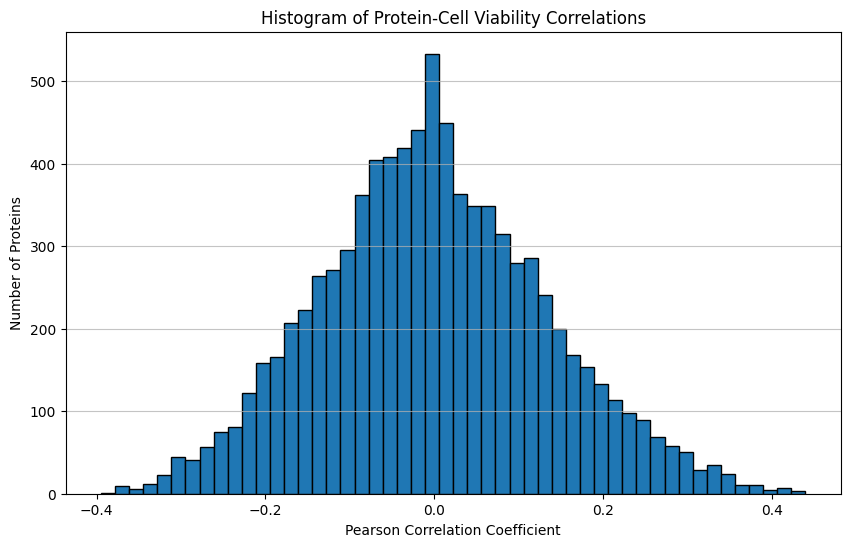

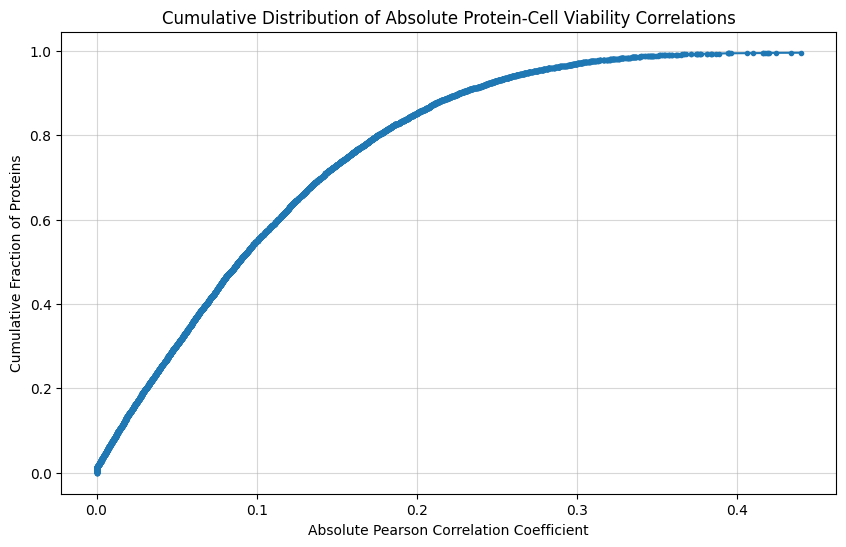

In [55]:
#pearson on the raw data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

raw_data_path=r'C:\Users\abdul\OneDrive - University of Cambridge\Desktop\MDRA\cellbox_torch\Abdullah_kuziez\Experiments\raw_data\data.csv'
raw_data=pd.read_csv(raw_data_path)


cell_viability_col = 'Cell_viability%_(cck8Drug-blk)/(control-blk)*100'

raw_data_filled = raw_data.fillna(raw_data.mean())
protein_data = raw_data_filled.iloc[:, 1:-12]
cell_viability = raw_data[cell_viability_col]

# Calculate Pearson correlation for each protein with cell viability
correlations = protein_data.apply(lambda x: cell_viability.corr(x), axis=0)

# Sort proteins by absolute correlation (descending)
sorted_corr = correlations.reindex(correlations.abs().sort_values(ascending=False).index)

# Display the top correlated proteins
for protein, coeff in sorted_corr.head(50).items():
    print(f"{protein}: {coeff}")
plt.figure(figsize=(10,6))
plt.hist(correlations, bins=50, edgecolor='black')
plt.title('Histogram of Protein-Cell Viability Correlations')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Number of Proteins')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Plot cumulative distribution of absolute correlations
abs_corr_sorted = correlations.abs().sort_values(ascending=True)
cum_values = np.arange(1, len(abs_corr_sorted)+1) / len(abs_corr_sorted)

plt.figure(figsize=(10,6))
plt.plot(abs_corr_sorted.values, cum_values, marker='.', linestyle='-')
plt.title('Cumulative Distribution of Absolute Protein-Cell Viability Correlations')
plt.xlabel('Absolute Pearson Correlation Coefficient')
plt.ylabel('Cumulative Fraction of Proteins')
plt.grid(True, alpha=0.5)
plt.show()





C:\Users\abdul\AppData\Local\Temp\ipykernel_3736\2216217574.py:11: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  log_ratios_filled = log_ratios_raw.fillna(log_ratios_raw.mean())


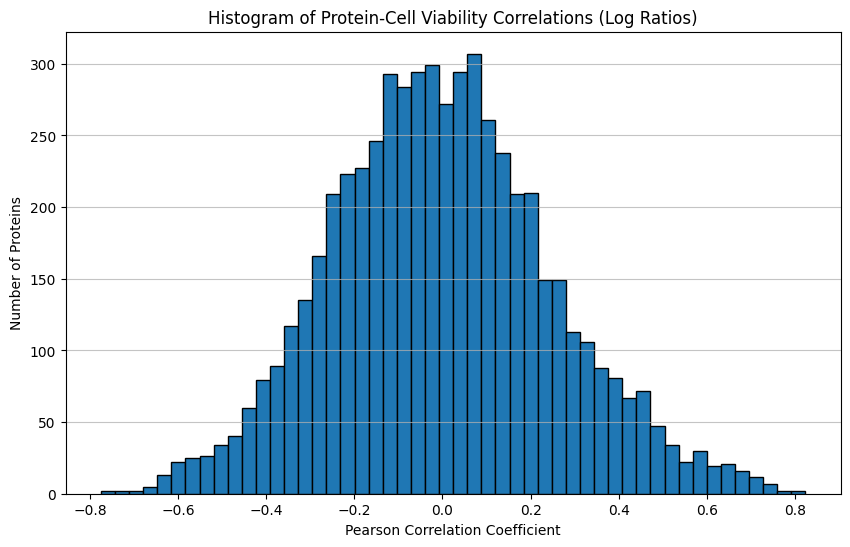

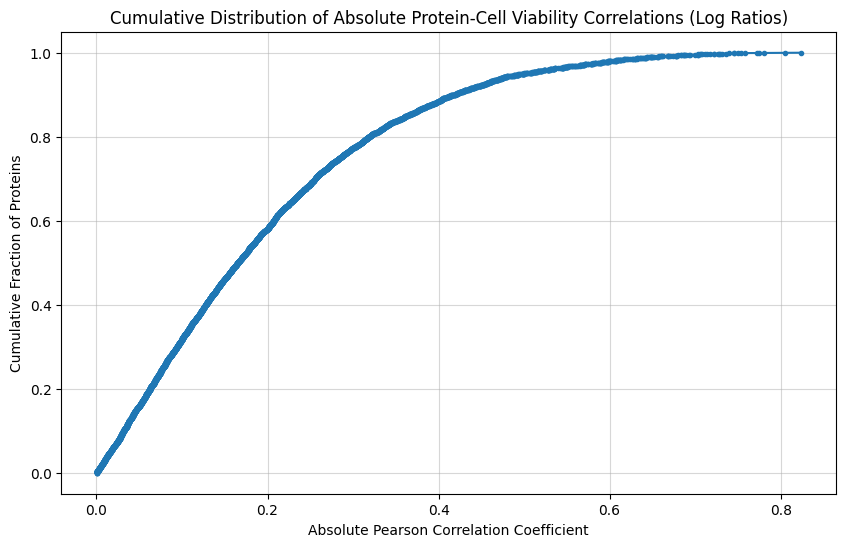

Top 50 proteins by absolute correlation with cell viability (log ratios):
Q9NXW2: 0.8238
P37268: 0.8045
Q14168: 0.7802
P08243: -0.7752
O43663: 0.7719
Q01581: 0.7580
Q92974: -0.7533
Q8TEQ8: 0.7498
Q6ZS17: 0.7456
Q96GD4: 0.7452
Q14681: 0.7399
Q9H496: 0.7360
P28340: 0.7317
Q16822: -0.7295
Q13907: 0.7275
Q8TAV0: 0.7267
Q12834: 0.7220
Q9H4H8: 0.7215
Q9NXG6: 0.7170
P04183: 0.7134
P11021: -0.7114
P25098: 0.7083
O00767: 0.7066
Q8IV63: 0.7052
P46531: 0.7037
Q9ULT8: 0.7035
P49588: -0.7032
O75717: 0.7004
O75534: 0.6936
P52701: 0.6925
P08238: 0.6898
Q2NKX8: 0.6883
Q96CX6: 0.6870
P17174: -0.6869
Q9Y4U1: 0.6856
Q6IQ26: 0.6836
Q15773: 0.6831
Q8TBF2: 0.6799
P58107: 0.6785
Q14691: 0.6779
Q9NQW6: 0.6774
P49005: 0.6772
O75925: 0.6740
Q15067: -0.6705
O95479: -0.6683
P53004: 0.6683
Q9GZT9: 0.6680
Q6ZWJ1: 0.6620
Q8TF42: 0.6616
Q6PD74: 0.6606

Proteins in the top 100 most correlated in BOTH log ratios and raw data (3 proteins):

Protein                Log Corr   Raw Corr   Log Rank   Raw Rank
---------------

In [56]:
#/////////pearson on the log transforms///////////
#///////////////////////////////
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

cell_viability_col = 'Cell_viability%_(cck8Drug-blk)/(control-blk)*100'
log_ratios_path=r'C:\Users\abdul\OneDrive - University of Cambridge\Desktop\MDRA\cellbox_torch\Abdullah_kuziez\preprocessing\Intermediate_files\log_ratios.csv'
log_ratios_raw=pd.read_csv(log_ratios_path)
# Calculate Pearson correlation for each protein in log_ratios with cell viability
log_ratios_filled = log_ratios_raw.fillna(log_ratios_raw.mean())
# Assume the log_ratios file has the same cell_viability_col as before, or if not, adjust accordingly
if cell_viability_col in log_ratios_raw.columns:
    log_cell_viability = log_ratios_raw[cell_viability_col]
    log_protein_data = log_ratios_filled.drop(columns=cell_viability_col).iloc[:,1:-12]
else:
    # If cell viability is not in log_ratios, use the one from raw_data
    log_cell_viability = cell_viability
    log_protein_data = log_ratios_filled.iloc[:, 1:]

log_correlations = log_protein_data.apply(lambda x: log_cell_viability.corr(x), axis=0)

# Plot histogram of correlations
plt.figure(figsize=(10,6))
plt.hist(log_correlations, bins=50, edgecolor='black')
plt.title('Histogram of Protein-Cell Viability Correlations (Log Ratios)')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Number of Proteins')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Plot cumulative distribution of absolute correlations
log_abs_corr_sorted = log_correlations.abs().sort_values(ascending=True)
log_cum_values = np.arange(1, len(log_abs_corr_sorted)+1) / len(log_abs_corr_sorted)

plt.figure(figsize=(10,6))
plt.plot(log_abs_corr_sorted.values, log_cum_values, marker='.', linestyle='-')
plt.title('Cumulative Distribution of Absolute Protein-Cell Viability Correlations (Log Ratios)')
plt.xlabel('Absolute Pearson Correlation Coefficient')
plt.ylabel('Cumulative Fraction of Proteins')
plt.grid(True, alpha=0.5)
plt.show()

# Print the top 50 proteins and their correlation scores (sorted by absolute value, descending)
top_50 = log_correlations.abs().sort_values(ascending=False).head(50)
print("Top 50 proteins by absolute correlation with cell viability (log ratios):")
for protein in top_50.index:
    print(f"{protein}: {log_correlations[protein]:.4f}")
#///////////////////////////Printiing which proteins are in the top 100 in both log and raw data////////////////////
# Find top 100 proteins by absolute correlation in log ratios
top_100_log = log_correlations.abs().sort_values(ascending=False).head(100)
top_100_log_proteins = set(top_100_log.index)

# Now, calculate correlations for the raw data
# Assume cell_viability and protein_data are defined as in previous cells
# If not, try to reconstruct them from log_ratios_raw or reload as needed

# Try to get cell_viability and protein_data from previous context
try:
    cell_viability
    protein_data
except NameError:
    # Try to reconstruct from log_ratios_raw or reload
    # If log_ratios_raw has the same columns as raw_data, use it
    # Otherwise, reload raw_data
    data_path = r'C:\Users\abdul\OneDrive - University of Cambridge\Desktop\MDRA\cellbox_torch\Abdullah_kuziez\Experiments\raw_data\data.csv'
    raw_data = pd.read_csv(data_path)
    if cell_viability_col in raw_data.columns:
        cell_viability = raw_data[cell_viability_col]
        # Exclude non-protein columns (assume first column is sample_id, last 12 columns are metadata)
        protein_data = raw_data.drop(columns=[cell_viability_col]).iloc[:,1:-12]
    else:
        raise ValueError("Cell viability column not found in raw data.")

# Calculate Pearson correlation for each protein in raw data with cell viability
raw_correlations = protein_data.apply(lambda x: cell_viability.corr(x), axis=0)

# Find top 100 proteins by absolute correlation in raw data
top_100_raw = raw_correlations.abs().sort_values(ascending=False).head(100)
top_100_raw_proteins = set(top_100_raw.index)

# Find intersection
common_proteins = top_100_log_proteins & top_100_raw_proteins

print(f"\nProteins in the top 100 most correlated in BOTH log ratios and raw data ({len(common_proteins)} proteins):\n")
print(f"{'Protein':<20} {'Log Corr':>10} {'Raw Corr':>10} {'Log Rank':>10} {'Raw Rank':>10}")
print("-"*65)
for protein in sorted(common_proteins):
    log_corr = log_correlations[protein]
    raw_corr = raw_correlations[protein]
    # Rank is 1-based index in sorted list (descending by abs corr)
    log_rank = log_correlations.abs().sort_values(ascending=False).index.get_loc(protein) + 1
    raw_rank = raw_correlations.abs().sort_values(ascending=False).index.get_loc(protein) + 1
    print(f"{protein:<20} {log_corr:10.4f} {raw_corr:10.4f} {log_rank:10d} {raw_rank:10d}")


C:\Users\abdul\AppData\Local\Temp\ipykernel_3736\1117490152.py:8: DtypeWarning: Columns (8546) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data=pd.read_csv(raw_data_path)


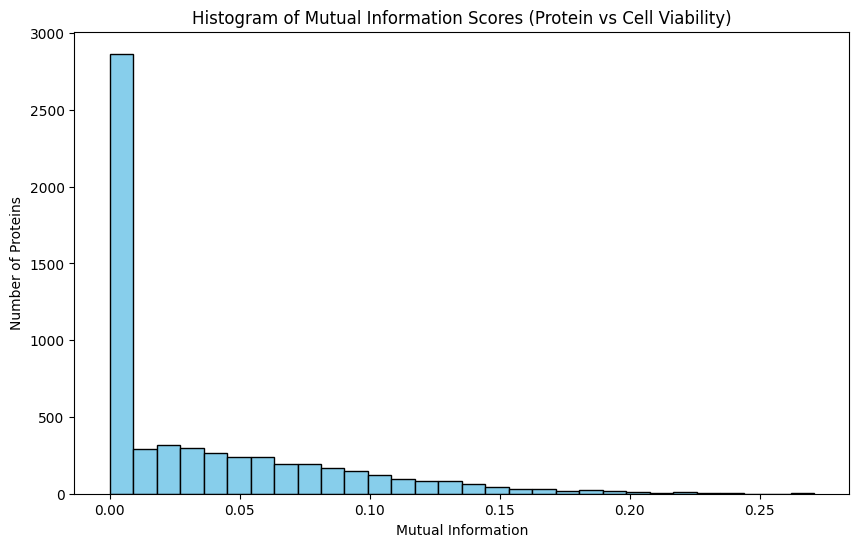

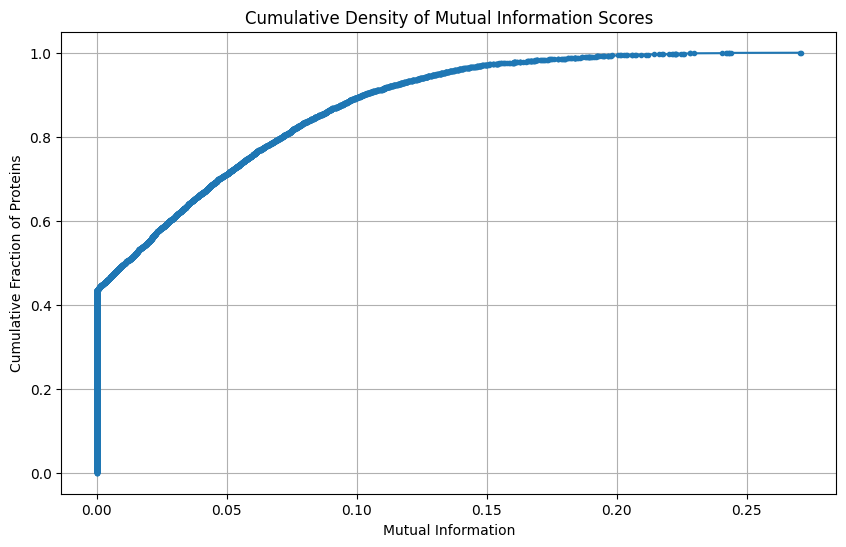


Top 50 proteins by mutual information with cell viability:

Rank  Protein               Mutual Info
----------------------------------------
1     Q9NPA0                    0.27089
2     P40616                    0.27064
3     Q9GZY4                    0.24394
4     Q6P1M0                    0.24328
5     O43290                    0.24312
6     P34932                    0.24240
7     Q9BZE9                    0.24193
8     O43676                    0.24048
9     P43155                    0.22958
10    Q9BPX5                    0.22805
11    P60891                    0.22801
12    Q99707                    0.22591
13    Q9UJ68                    0.22557
14    Q9Y3E7                    0.22488
15    Q8NI35                    0.22289
16    Q9Y490                    0.22286
17    O75607                    0.22257
18    Q8IWZ3                    0.22249
19    Q9C005                    0.22151
20    O96019                    0.22124
21    Q9H0R4                    0.22014
22    Q14807      

In [57]:
#using mutual information to deterimine most important proteins:
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import numpy as np


raw_data_path=r'C:\Users\abdul\OneDrive - University of Cambridge\Desktop\MDRA\cellbox_torch\Abdullah_kuziez\Experiments\raw_data\data.csv'
raw_data=pd.read_csv(raw_data_path)
# Keep only columns that are >95% complete
col_thresh = int(0.95 * len(raw_data))
raw_data_95 = raw_data.dropna(axis=1, thresh=col_thresh)
# Now keep only rows that are >95% complete (after column filtering)
row_thresh = int(0.95 * raw_data_95.shape[1])
raw_data_95 = raw_data_95.dropna(axis=0, thresh=row_thresh)

protein_data_clean=raw_data_95.iloc[:,1:-12].fillna(raw_data_95.iloc[:,1:-12].mean())
cell_viability=raw_data_95['Cell_viability%_(cck8Drug-blk)/(control-blk)*100'].fillna(raw_data_95['Cell_viability%_(cck8Drug-blk)/(control-blk)*100'].mean())
# Ensure cell_viability and protein_data are available (should be from previous cells)
# If not, raise an error

# Compute mutual information between each protein and cell viability
# Drop any columns with all NaN (if any)
# protein_data_clean = protein_data.dropna(axis=1, how='all')
# Fill NaN with column mean for MI calculation
protein_data_filled = protein_data_clean.fillna(protein_data_clean.mean())
cell_viability_filled = cell_viability.fillna(cell_viability.mean())

mi_scores = mutual_info_regression(
    protein_data_filled.values, 
    cell_viability_filled.values, 
    random_state=0
)
mi_series = pd.Series(mi_scores, index=protein_data_filled.columns)

# Plot histogram of MI scores
plt.figure(figsize=(10,6))
plt.hist(mi_series, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Mutual Information Scores (Protein vs Cell Viability)')
plt.xlabel('Mutual Information')
plt.ylabel('Number of Proteins')
plt.show()

# Plot cumulative density graph
plt.figure(figsize=(10,6))
sorted_mi = np.sort(mi_series)
cdf = np.arange(1, len(sorted_mi)+1) / len(sorted_mi)
plt.plot(sorted_mi, cdf, marker='.', linestyle='-')
plt.title('Cumulative Density of Mutual Information Scores')
plt.xlabel('Mutual Information')
plt.ylabel('Cumulative Fraction of Proteins')
plt.grid(True)
plt.show()

# Print top 50 proteins by MI
top_50_mi = mi_series.sort_values(ascending=False).head(50)
print("\nTop 50 proteins by mutual information with cell viability:\n")
print(f"{'Rank':<5} {'Protein':<20} {'Mutual Info':>12}")
print("-"*40)
for i, (protein, mi) in enumerate(top_50_mi.items(), 1):
    print(f"{i:<5} {protein:<20} {mi:12.5f}")

# ///////////////////
# Get the top 100 proteins by mutual information
top_100_mi = mi_series.sort_values(ascending=False).head(100)
top_100_proteins_mi_names = list(top_100_mi.index)


In [58]:

# Get the top quartile (top 25%) of proteins by mutual information
quartile_cutoff = mi_series.quantile(0.75)
top_quartile_proteins = mi_series[mi_series >= quartile_cutoff]
top_quartile_protein_names = list(top_quartile_proteins.index)




C:\Users\abdul\AppData\Local\Temp\ipykernel_3736\3618638508.py:3: DtypeWarning: Columns (8546) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw=pd.read_csv(r'C:\Users\abdul\OneDrive - University of Cambridge\Desktop\MDRA\cellbox_torch\Abdullah_kuziez\Experiments\raw_data\data.csv')
c:\Users\abdul\.conda\envs\cellbox\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.361e+01, tolerance: 4.748e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\abdul\.conda\envs\cellbox\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.842e+02, tolerance: 4.748e+00
  

Best L1 Ratio: 0.78
Best Alpha: 6.723357536499335
R^2: 0.12354383600867114 MSE: 536.3203567037013
Pearson's r: 0.509 (p=1.6e-07)


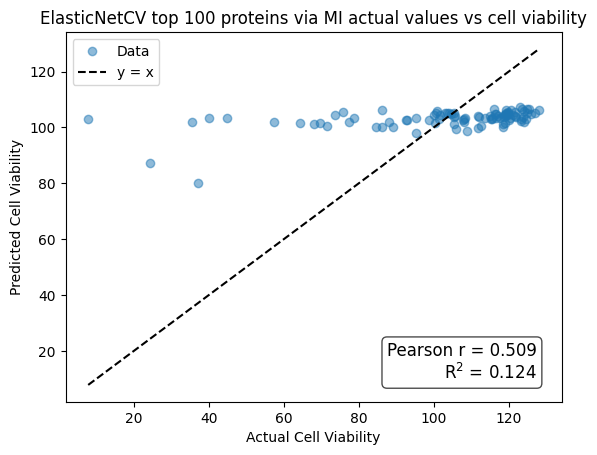

In [59]:
#Elasticnet on the top 100 proteins via MI actual values
import pandas as pd
df_raw=pd.read_csv(r'C:\Users\abdul\OneDrive - University of Cambridge\Desktop\MDRA\cellbox_torch\Abdullah_kuziez\Experiments\raw_data\data.csv')
cell_viability=df_raw['Cell_viability%_(cck8Drug-blk)/(control-blk)*100']
top_100_proteins_mi=df_raw[top_100_proteins_mi_names]
top_100_proteins_mi=top_100_proteins_mi.fillna(top_100_proteins_mi.mean())
results = run_elasticnet_cv(cell_viability, top_100_proteins_mi)

plt.title('ElasticNetCV top 100 proteins via MI actual values vs cell viability')
plt.show()


In [60]:
#random forest and gradient boosting

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def run_random_forest_and_plot(X, y, n_top_features=20, test_size=0.2, random_state=42):
    """
    Runs Random Forest regression, plots feature importances, and predicted vs actual values for both train and test sets.

    Parameters:
        X (pd.DataFrame): Feature matrix.
        y (pd.Series or np.ndarray): Target vector.
        n_top_features (int): Number of top features to plot.
        test_size (float): Fraction of data to use as test set.
        random_state (int): Random state for reproducibility.
    """
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    # Initialize and fit Random Forest Regressor
    rf = RandomForestRegressor(n_estimators=100, random_state=random_state, n_jobs=-1)
    rf.fit(X_train, y_train)

    # Predict on train and test sets
    y_pred_train = rf.predict(X_train)
    y_pred_test = rf.predict(X_test)

    # Compute metrics
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    print("Random Forest Regression (top 100 MI proteins):")
    print(f"Train set:    MSE = {mse_train:.4f}, R^2 = {r2_train:.4f}")
    print(f"Test set:     MSE = {mse_test:.4f}, R^2 = {r2_test:.4f}")

    # Feature importances
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]
    top_features = [X.columns[i] for i in indices[:n_top_features]]

    plt.figure(figsize=(10,6))
    plt.title(f"Top {n_top_features} Feature Importances (Random Forest)")
    plt.bar(range(n_top_features), importances[indices[:n_top_features]], align="center")
    plt.xticks(range(n_top_features), top_features, rotation=90)
    plt.ylabel("Importance")
    plt.tight_layout()
    plt.show()

    # Plot predicted vs actual for training set
    plt.figure(figsize=(8,6))
    plt.scatter(y_train, y_pred_train, alpha=0.6, label='Train')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    plt.xlabel("Actual Cell Viability")
    plt.ylabel("Predicted Cell Viability")
    plt.title("Random Forest: Predicted vs Actual Cell Viability (Train Set)")
    plt.tight_layout()
    plt.show()

    # Plot predicted vs actual for test set
    plt.figure(figsize=(8,6))
    plt.scatter(y_test, y_pred_test, alpha=0.6, color='orange', label='Test')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    plt.xlabel("Actual Cell Viability")
    plt.ylabel("Predicted Cell Viability")
    plt.title("Random Forest: Predicted vs Actual Cell Viability (Test Set)")
    plt.tight_layout()
    plt.show()
    # Plot learning curves for the Random Forest model
    from sklearn.model_selection import learning_curve

    train_sizes, train_scores, test_scores = learning_curve(
        rf, X, y, cv=5, scoring='neg_mean_squared_error',
        n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=random_state
    )

    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title("Learning Curves (Random Forest)")
    plt.xlabel("Training examples")
    plt.ylabel("MSE")
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training MSE")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation MSE")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()
    return


#////////////////////Gradient Boosting//////////////////////
def run_gradient_boosting_and_plot_cv(X, y, random_state=42):
    """
    Run Gradient Boosted Regression (using sklearn's GradientBoostingRegressor) on the given data,
    perform 5-fold cross-validation, print average train/test MSE and R^2, plot most important features
    (averaged over folds), plot predicted vs actual for train/test for one fold, and plot learning curves.
    """
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.model_selection import KFold, learning_curve
    from sklearn.metrics import mean_squared_error, r2_score
    import matplotlib.pyplot as plt
    import numpy as np

    importances_label = getattr(X, 'columns', [f'Feature {i}' for i in range(X.shape[1])])

    kf = KFold(n_splits=5, shuffle=True, random_state=random_state)
    train_mse_list, test_mse_list = [], []
    train_r2_list, test_r2_list = [], []
    feature_importances = np.zeros(X.shape[1])
    fold = 0
    y_train_all, y_pred_train_all, y_test_all, y_pred_test_all = None, None, None, None

    for train_idx, test_idx in kf.split(X):
        fold += 1
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        gb = GradientBoostingRegressor(random_state=random_state,min_samples_split=10,min_samples_leaf=10, n_estimators=50,max_depth=3) #This is the line
        gb.fit(X_train, y_train)

        y_pred_train = gb.predict(X_train)
        y_pred_test = gb.predict(X_test)

        train_mse = mean_squared_error(y_train, y_pred_train)
        test_mse = mean_squared_error(y_test, y_pred_test)
        train_r2 = r2_score(y_train, y_pred_train)
        test_r2 = r2_score(y_test, y_pred_test)

        train_mse_list.append(train_mse)
        test_mse_list.append(test_mse)
        train_r2_list.append(train_r2)
        test_r2_list.append(test_r2)
        feature_importances += gb.feature_importances_

        # Save predictions for the first fold for plotting
        if fold == 1:
            y_train_all, y_pred_train_all = y_train, y_pred_train
            y_test_all, y_pred_test_all = y_test, y_pred_test

    feature_importances /= 5

    print("Gradient Boosted Regression 5-Fold CV Results (averaged):")
    print(f"Train MSE: {np.mean(train_mse_list):.4f} ± {np.std(train_mse_list):.4f}, R^2: {np.mean(train_r2_list):.4f} ± {np.std(train_r2_list):.4f}")
    print(f"Test  MSE: {np.mean(test_mse_list):.4f} ± {np.std(test_mse_list):.4f}, R^2: {np.mean(test_r2_list):.4f} ± {np.std(test_r2_list):.4f}")
    for i in range(5):
        print(f"Fold {i+1}: Test MSE = {test_mse_list[i]:.4f}, Test R^2 = {test_r2_list[i]:.4f}")
    # Feature importances (averaged)
    indices = np.argsort(feature_importances)[::-1]
    top_n = min(20, len(feature_importances))
    plt.figure(figsize=(10, 6))
    plt.title("Top Feature Importances (Gradient Boosting, 5-Fold CV Average)")
    plt.bar(range(top_n), feature_importances[indices[:top_n]], align="center")
    plt.xticks(range(top_n), [importances_label[i] for i in indices[:top_n]], rotation=90)
    plt.tight_layout()
    plt.show()

    # Predicted vs Actual (Train, first fold)
    plt.figure(figsize=(8,6))
    plt.scatter(y_train_all, y_pred_train_all, alpha=0.6, label='Train')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    plt.xlabel("Actual Cell Viability")
    plt.ylabel("Predicted Cell Viability")
    plt.title("Gradient Boosting: Predicted vs Actual Cell Viability (Train Set, Fold 1)")
    plt.tight_layout()
    plt.show()

    # Predicted vs Actual (Test, first fold)
    plt.figure(figsize=(8,6))
    plt.scatter(y_test_all, y_pred_test_all, alpha=0.6, color='orange', label='Test')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    plt.xlabel("Actual Cell Viability")
    plt.ylabel("Predicted Cell Viability")
    plt.title("Gradient Boosting: Predicted vs Actual Cell Viability (Test Set, Fold 1)")
    plt.tight_layout()
    plt.show()

    # Learning curves (on full data)
    gb = GradientBoostingRegressor(random_state=random_state)
    train_sizes, train_scores, test_scores = learning_curve(
        gb, X, y, cv=5, scoring='neg_mean_squared_error',
        n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=random_state
    )
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title("Learning Curves (Gradient Boosting, 5-Fold CV)")
    plt.xlabel("Training examples")
    plt.ylabel("MSE")
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training MSE")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation MSE")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()
    return



Random Forest Regression (top 100 MI proteins):
Train set:    MSE = 83.2111, R^2 = 0.8642
Test set:     MSE = 543.3691, R^2 = 0.0528


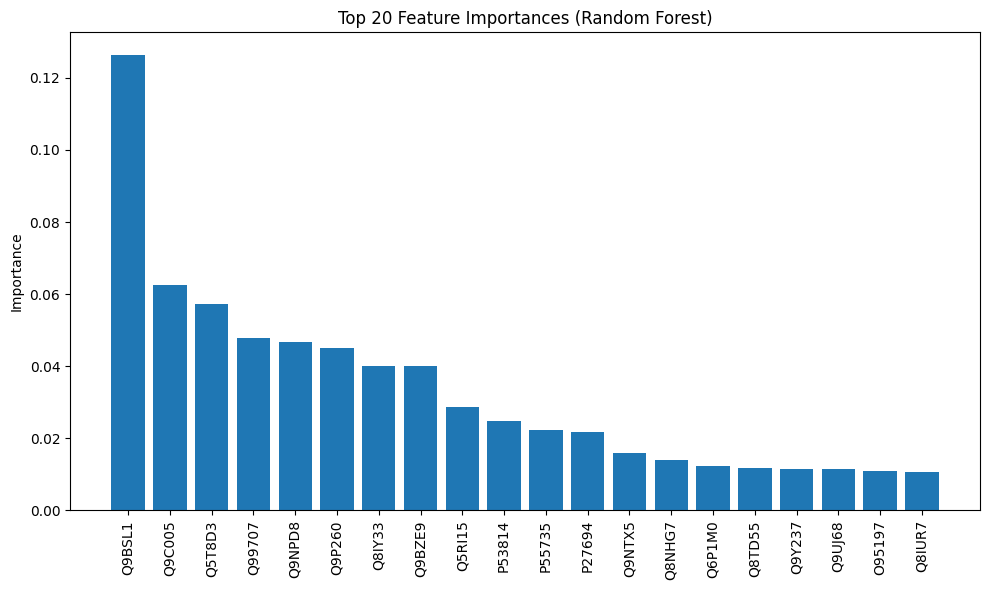

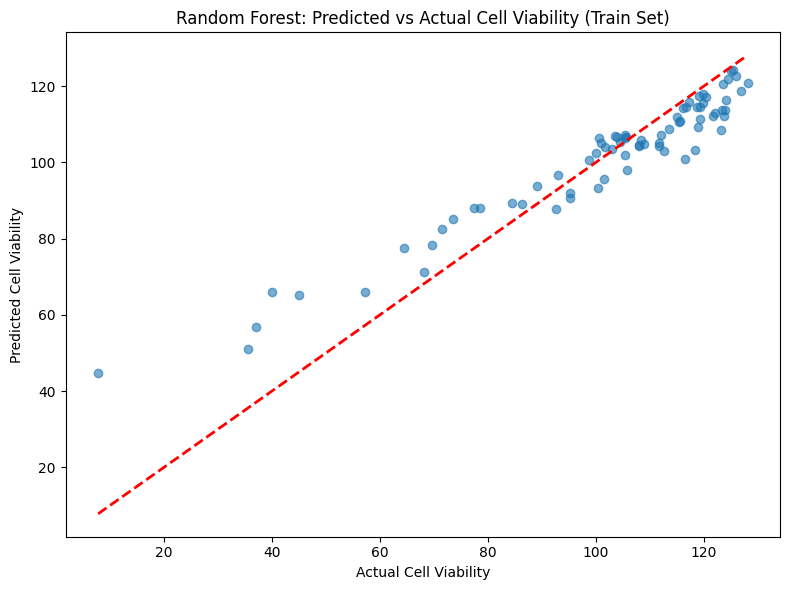

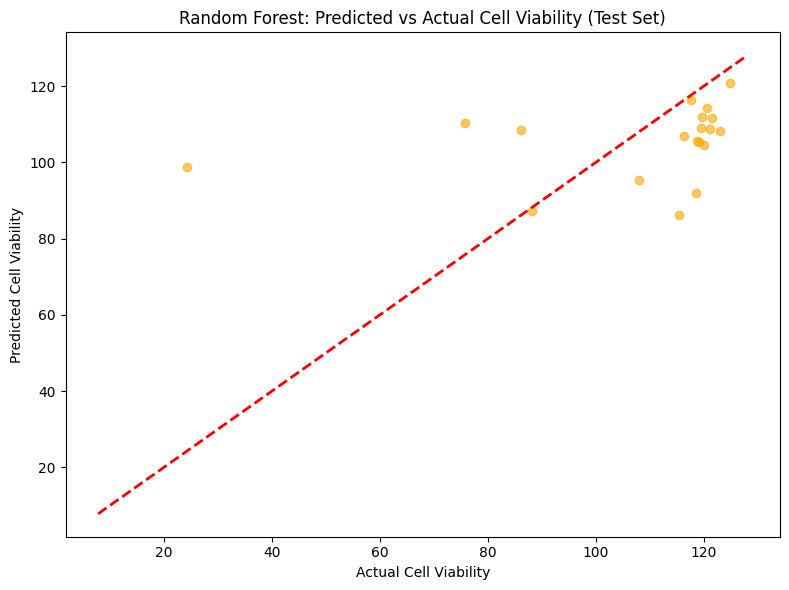

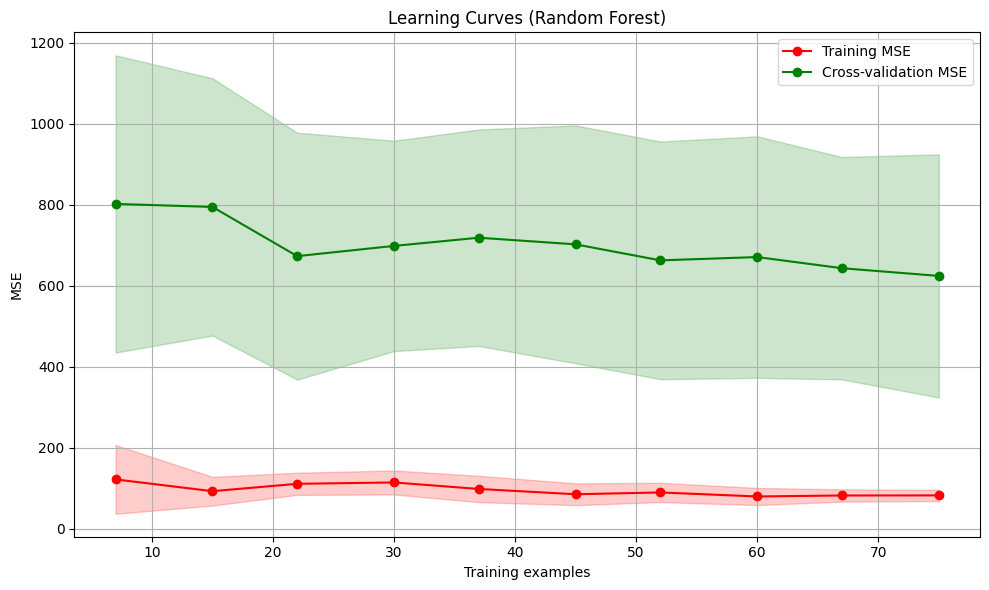

In [61]:

# Call the function with the prepared data
run_random_forest_and_plot(top_100_proteins_mi, cell_viability)


Gradient Boosted Regression 5-Fold CV Results (averaged):
Train MSE: 34.4450 ± 7.7776, R^2: 0.9408 ± 0.0174
Test  MSE: 681.8466 ± 488.1908, R^2: -0.2968 ± 0.2472
Fold 1: Test MSE = 818.2442, Test R^2 = -0.4264
Fold 2: Test MSE = 183.5676, Test R^2 = -0.6870
Fold 3: Test MSE = 392.6173, Test R^2 = -0.1837
Fold 4: Test MSE = 1568.2669, Test R^2 = -0.2368
Fold 5: Test MSE = 446.5370, Test R^2 = 0.0498


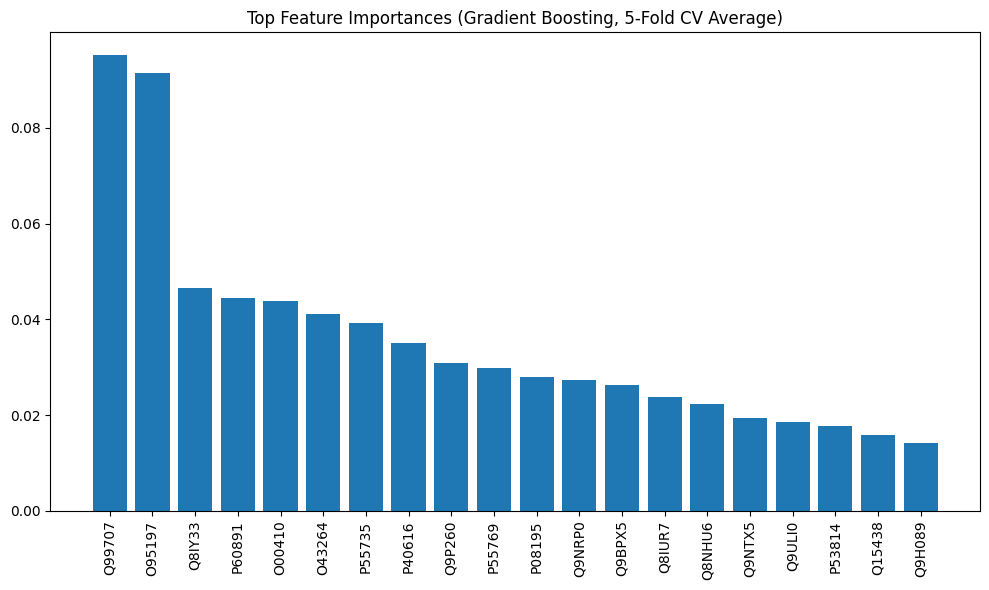

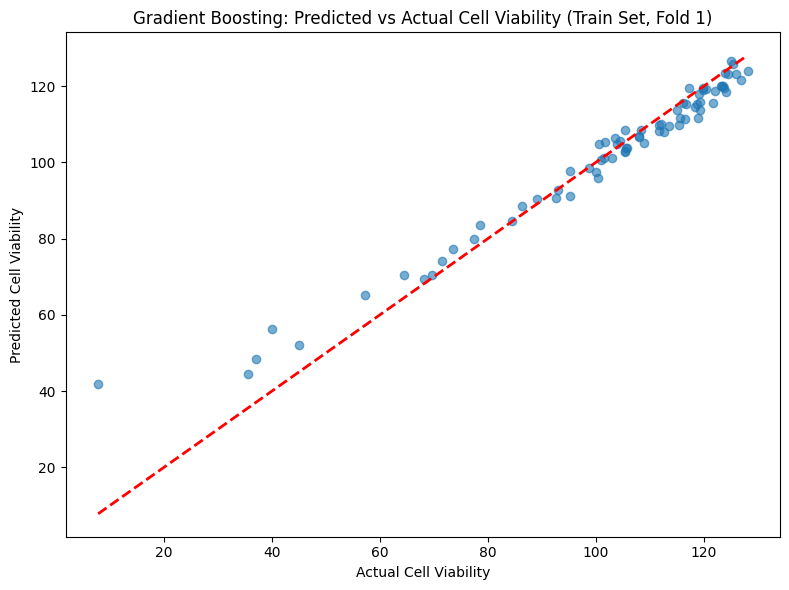

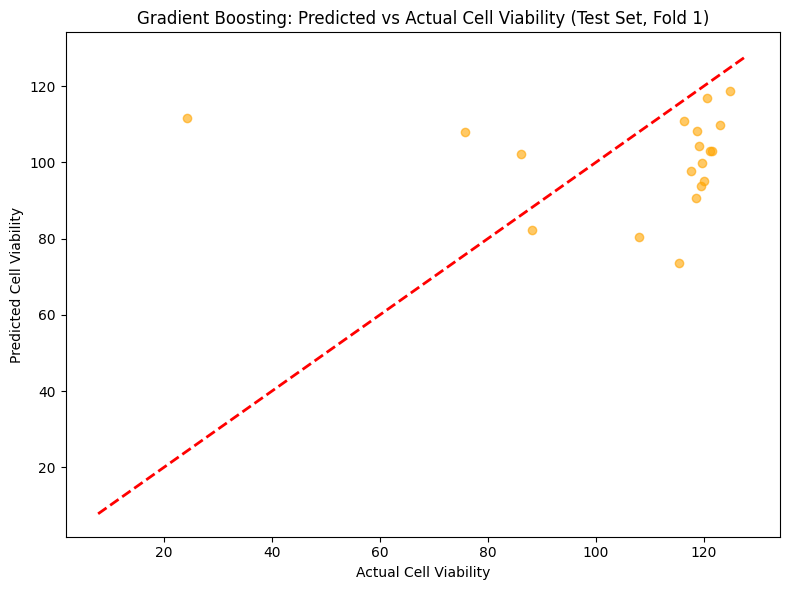

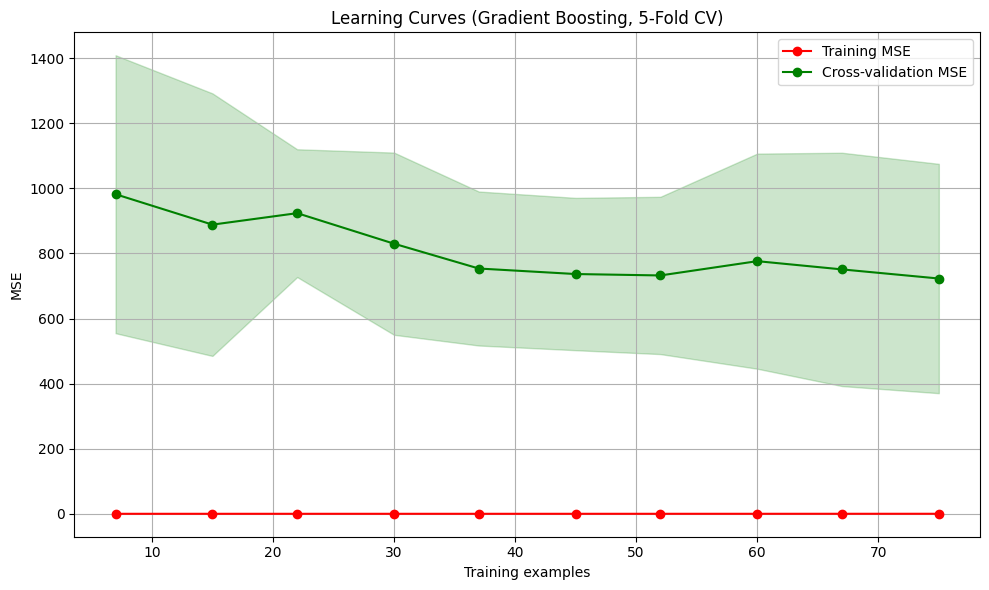

In [62]:
run_gradient_boosting_and_plot_cv(top_100_proteins_mi, cell_viability)

In [63]:
#Running a kernel PCA
import pandas as pd
import numpy as np
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

raw_data_path=r'C:\Users\abdul\OneDrive - University of Cambridge\Desktop\MDRA\cellbox_torch\Abdullah_kuziez\Experiments\raw_data\data.csv'
raw_data=pd.read_csv(raw_data_path)
# Keep only columns that are >95% complete
col_thresh = int(0.95 * len(raw_data))
raw_data_95 = raw_data.dropna(axis=1, thresh=col_thresh)
# Now keep only rows that are >95% complete (after column filtering)
row_thresh = int(0.95 * raw_data_95.shape[1])
raw_data_95 = raw_data_95.dropna(axis=0, thresh=row_thresh)
log_transform=np.log2(raw_data_95.iloc[:,1:-12])
log_transform=log_transform.fillna(log_transform.mean())

cell_viability=raw_data_95['Cell_viability%_(cck8Drug-blk)/(control-blk)*100']
log_cell_viability=np.log2(cell_viability)
log_cell_viability=log_cell_viability.fillna(log_cell_viability.mean())
zscored_log_transform=log_transform.apply(lambda x: (x-x.mean())/x.std())
zscored_log_transform=zscored_log_transform.fillna(zscored_log_transform.mean())

cell_viability=raw_data_95['Cell_viability%_(cck8Drug-blk)/(control-blk)*100']
log_cell_viability=np.log2(cell_viability)
log_cell_viability=log_cell_viability.fillna(log_cell_viability.mean())
zscored_log_cell_viability = (log_cell_viability - log_cell_viability.mean()) / log_cell_viability.std()
zscored_log_cell_viability = zscored_log_cell_viability.fillna(zscored_log_cell_viability.mean())


features = zscored_log_transform  # z-scored log-transformed proteomics data
target = zscored_log_cell_viability  # z-scored log cell viability
features=features.fillna(features.mean())

nan_indices = np.where(features.isna())
for row_idx, col_idx in zip(*nan_indices):
    print(f"NaN found at row {row_idx}, column '{features.columns[col_idx]}'")


C:\Users\abdul\AppData\Local\Temp\ipykernel_3736\451101277.py:8: DtypeWarning: Columns (8546) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data=pd.read_csv(raw_data_path)


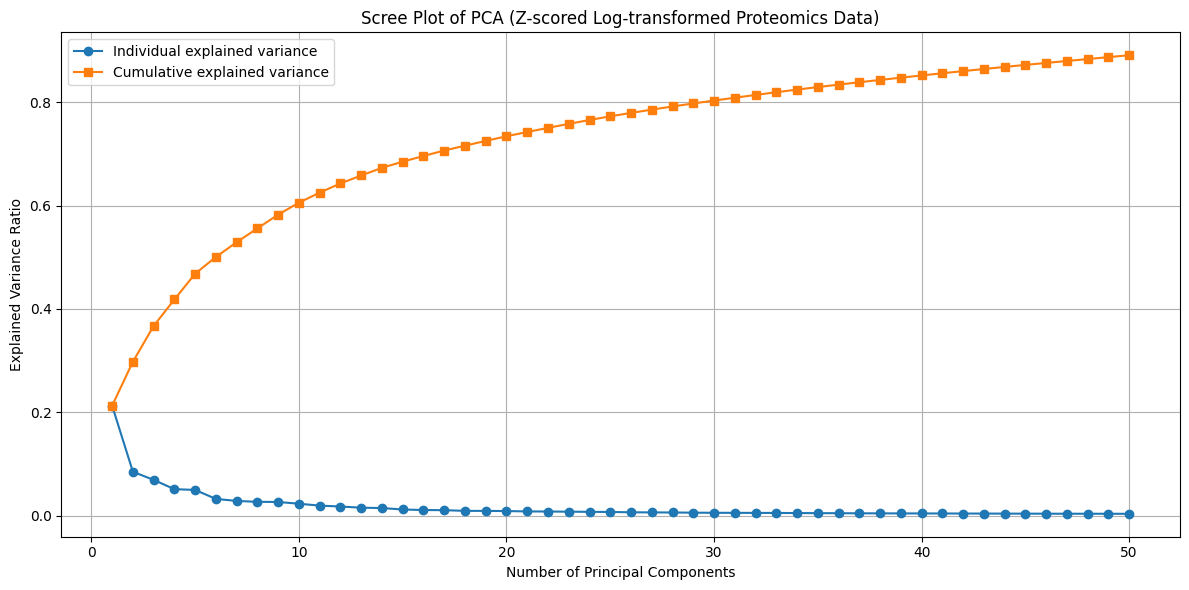


Component 1:
  Q9Y3B4: contribution=-0.0270, percent of total abs contribution=0.04%
  Q969L2: contribution=-0.0270, percent of total abs contribution=0.04%
  Q5JSL3: contribution=0.0269, percent of total abs contribution=0.04%
  P62314: contribution=-0.0269, percent of total abs contribution=0.04%
  Q6NYC8: contribution=0.0269, percent of total abs contribution=0.04%

Component 2:
  Q9Y4L1: contribution=-0.0378, percent of total abs contribution=0.06%
  Q96ST3: contribution=0.0368, percent of total abs contribution=0.06%
  P00966: contribution=-0.0367, percent of total abs contribution=0.06%
  Q9UBL0: contribution=0.0366, percent of total abs contribution=0.06%
  Q13362: contribution=0.0365, percent of total abs contribution=0.06%

Component 3:
  P43246: contribution=-0.0379, percent of total abs contribution=0.06%
  Q15003: contribution=-0.0367, percent of total abs contribution=0.06%
  Q06136: contribution=0.0366, percent of total abs contribution=0.06%
  Q14444: contribution=-0.03

In [64]:
from sklearn.decomposition import PCA

# Scree plot for PCA (not kernel PCA, as kernel PCA does not provide explained variance)
n_components = 50
pca = PCA(n_components=n_components, random_state=42)
pca.fit(features)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(12, 6))
plt.plot(range(1, n_components + 1), explained_variance_ratio, marker='o', label='Individual explained variance')
plt.plot(range(1, n_components + 1), cumulative_variance, marker='s', label='Cumulative explained variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot of PCA (Z-scored Log-transformed Proteomics Data)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



from sklearn.decomposition import KernelPCA
import seaborn as sns



pca_components = pca.components_  # shape: (n_components, n_features)
feature_names = features.columns

top_proteins_per_component = []

for i in range(20):
    component = pca_components[i]
    abs_component = np.abs(component)
    top5_idx = np.argsort(abs_component)[-5:][::-1]
    top5_proteins = feature_names[top5_idx]
    top5_contributions = component[top5_idx]
    total_abs = abs_component.sum()
    top5_percent = 100 * np.abs(top5_contributions) / total_abs

    print(f"\nComponent {i+1}:")
    for j in range(5):
        print(f"  {top5_proteins[j]}: contribution={top5_contributions[j]:.4f}, "
              f"percent of total abs contribution={top5_percent[j]:.2f}%")




In [65]:
from sklearn.decomposition import SparsePCA
features=(np.log2(protein_data_clean[top_quartile_protein_names])).apply(lambda x: (x-x.mean())/x.std()).fillna(0)




In [66]:

import matplotlib.pyplot as plt

def run_spca_and_metrics(features, n_components, alpha=5):
    """
    Run SparsePCA for a given number of components and alpha,
    return reconstruction MSE and average number of proteins per component
    with >0.01% of total absolute loading.
    """
    spca = SparsePCA(n_components=n_components, alpha=alpha, random_state=42, max_iter=100)
    spca_features = spca.fit_transform(features)
    X = features.values
    X_spca = spca_features
    X_reconstructed = np.dot(X_spca, spca.components_)
    reconstruction_mse = np.mean((X - X_reconstructed) ** 2)
    
    num_proteins_above_threshold = []
    for i in range(n_components):
        component = spca.components_[i]
        abs_component = np.abs(component)
        total_abs = abs_component.sum()
        percent_contributions = 100 * abs_component / total_abs if total_abs != 0 else np.zeros_like(abs_component)
        num_above_threshold = np.sum(percent_contributions > 0.01)
        num_proteins_above_threshold.append(num_above_threshold)
    avg_num_proteins = np.mean(num_proteins_above_threshold)
    return reconstruction_mse, avg_num_proteins

def sweep_spca_components(features, component_range, alpha=5, plot=True):
    """
    Sweep over a range of SparsePCA component numbers, recording reconstruction MSE
    and average number of proteins per component with >0.01% of total absolute loading.
    Optionally plot the results.

    Args:
        features: DataFrame of features to use for SparsePCA.
        component_range: Iterable of component counts to try.
        alpha: Regularization parameter for SparsePCA.
        plot: If True, plot the results.

    Returns:
        mse_list: List of reconstruction MSEs for each component count.
        avg_num_proteins_above_threshold_list: List of average # proteins >0.01% per component.
    """
    mse_list = []
    avg_num_proteins_above_threshold_list = []

    for n_components in component_range:
        mse, avg_num_proteins = run_spca_and_metrics(features, n_components, alpha=alpha)
        mse_list.append(mse)
        avg_num_proteins_above_threshold_list.append(avg_num_proteins)
        print(f"SparsePCA with {n_components} components: MSE={mse:.4f}, "
              f"Avg. # proteins >0.01% per component: {avg_num_proteins:.2f}")

    if plot:
        # Plot average number of proteins >0.01% per component vs. number of components
        plt.figure(figsize=(10,6))
        plt.plot(component_range, avg_num_proteins_above_threshold_list, marker='o', label='Avg. # proteins >0.01%')
        plt.xlabel('Number of SparsePCA Components')
        plt.ylabel('Average # of Proteins >0.01% per Component')
        plt.title('Sparsity of Components vs. Number of Components (SparsePCA)')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

        # Plot MSE vs. number of components
        plt.figure(figsize=(10,6))
        plt.plot(component_range, mse_list, marker='o', color='orange', label='Reconstruction MSE')
        plt.xlabel('Number of SparsePCA Components')
        plt.ylabel('Reconstruction MSE')
        plt.title('Reconstruction MSE vs. Number of Components (SparsePCA)')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

    return mse_list, avg_num_proteins_above_threshold_list

# Example usage:
component_range = range(5, 86, 5)  # 5 to 85 components in steps of 5
alpha = 5  # can be parameterized
mse_list, avg_num_proteins_above_threshold_list = sweep_spca_components(features, component_range, alpha=alpha, plot=True)


KeyboardInterrupt: 

In [ ]:
component_range = range(0, 86, 5) 
alpha=1
import pandas as pd
filtered_SNR_MI_data=pd.read_csv(r'C:\Users\abdul\OneDrive - University of Cambridge\Desktop\MDRA\cellbox_torch\Abdullah_kuziez\preprocessing\Intermediate_files\completeness_log2_MI_SNR_values.csv')
features2=filtered_SNR_MI_data.iloc[:,1:-12]
from scipy.stats import zscore
features2 = features2.apply(zscore, axis=0)

mse_list, avg_num_proteins_above_threshold_list = sweep_spca_components(features2, component_range, alpha=alpha, plot=True)

TypeError: 'int' object is not iterable

In [ ]:
run_spca_and_metrics(features2, 50, alpha=1)

(0.27098765698432964, 351.84)

In [ ]:
#running an ablation study on the whole dataset to try to figure out which proteins are most important



In [ ]:
#writing in signal to noise filter on the data